### Death toll data from Wikipedia

This is an attempt to summarise war death toll data from Wikipedia: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll

I downloaded the data in April 2024. A similar topic has been recently explored in https://ourworldindata.org/war-and-peace, but their data starts at 1800. I'm not sure how Wikipedia data compares to other sources in terms of accuracy. My goal was to find the most intense wars when it comes to death toll and the longest wars.

The general approach is to extract and clean the dates and death ranges.

In [1]:
import pandas as pd
w = pd.read_csv(r"C:\Users\karol\projects\wikiWar\war_data_04_2024.csv")
w.head(30)

,War,Death\nrange,Date,Combatants,Location,Notes
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars
5,First Punic War,"400,000+",264 BC–241 BC,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa,Part of the Punic Wars
6,Gallic Wars,"1,000,000+",58 BC–50 BC,Roman Republic vs. Gallic tribes,France,NaN
7,Greco–Persian Wars,"300,000+",499 BC–449 BC,Greek City-States vs. Persian Empire,Greece,NaN
8,Hunnic Reclaims,"165,000+\n[citation needed]",395–453,Roman Empire vs. Hunnic Empire,Europe,Number given is the sum of all deaths in battl...
9,Iceni Revolt,"150,000+[4]",60–61,Roman Empire vs. Celtic tribes,England,Year is uncertain – Part of the Roman Conquest...


In [2]:
w[w['War'] == 'World War I']


,War,Death\nrange,Date,Combatants,Location,Notes
111,World War I,"17,000,000-40,000,000",1914–1918,Allied Powers vs. Central Powers,Worldwide,[27] – Also known as the Great War


In [3]:

#use start date as reference point, not the middle date

import re

def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group())
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondNumber(stringWithNumbers):
    try:
        # Match the input string with one of the specified formats
        #match = re.match(r'(\d+)-(\d+)|(\d+)-present|(\d+)|*-\s*(\d+)', stringWithNumbers)
        #match = re.search(r'–\s*(\d+)', t)
        match = re.search(r'–\s*(\d+).*|(\d+)–present', stringWithNumbers)

        
        if match:
            # Check which pattern matched
            if match.group(1):  # Format: "111-111212"
                return int(match.group(1))
            elif match.group(2):  # Format: "3434-present"
                return 2024
         
           
          
        
    except:
        pass
    
    # If no match or error occurred, return the original input as an integer
    return int(stringWithNumbers)

In [4]:
#t ='c. 475 BC – 221 BC'
#t = '12121'
#t ='1918–present'
t = '264 BC–241 BC'
#match = re.search(r'–\s*(\d+)', t)
extractSecondNumber(t)
#remember to use search instead of match

241

In [5]:
w['startDate'] = w['Date'].map(extractFirstNumber)
w['endDate'] = w['Date'].map(extractSecondNumber)



In [6]:
w

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...,132,136
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un...",475,221
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars,113,101
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...,549,530
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars,66,73
...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,"377,000+",2014–present,Yemen's Supreme Political Council vs. Hadi Gov...,Yemen,UNDP estimate for the end of 2021. 60% attribu...,2014,2024
197,Tigray War,"162,000–378,000+ (Total civilian casualties in...",2020–2022,UFEFCF vs. Ethiopian and Eritrean Government,"Ethiopia (Tigray, Afar and Amhara Regions)",Part of the Ethiopian civil conflict.,2020,2022
198,Myanmar Civil War,"48,519",2021–present,National Unity Government vs. State Administra...,Myanmar,Part of the Internal conflict in Myanmar.,2021,2024
199,Russian invasion of Ukraine,"300,000+",2022–present,Russia vs. Ukraine,Ukraine,Estimates of deaths vary widely.[145][146] The...,2022,2024


In [7]:
#check whether all dates got extracted

# This approach directly filters rows where the conversion to numeric results in NaN, 
# indicating that those rows contain string values in the 'startDate' column.

rows_with_strings = w[pd.to_numeric(w['startDate'], errors='coerce').isna()]
rows_with_strings

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [8]:
r = w[pd.to_numeric(w['endDate'], errors='coerce').isna()]
r

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [9]:
#create a BC column
w['BC'] = w['Date'].str.contains('BC')

In [10]:
w = w.rename(columns = {'Death\nrange':'casualties'})


Extract higher death toll range and lower death toll range and put them in separate columns

In [11]:
#extract higher range or any number if there is just one number
import re
def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group().replace(',', ''))
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondOrFirstNumber(stringWithNumbers):
    
    try:
        # Remove commas, then find all groups of digits
        stringWithNumbers =stringWithNumbers.replace(',', '')
        matches = re.findall(r'\d+',stringWithNumbers)
        if matches:
            if len(matches) == 1:
                return int(matches[0])
            elif len(matches) == 2 and '[' in stringWithNumbers and ']' in stringWithNumbers:
                # Check if the second value is in brackets
                return int(matches[0])
            else:
                return int(matches[1])
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers
    

In [12]:
w['higherRange'] = w['casualties'].map(extractSecondOrFirstNumber)
w['lowerRange'] = w['casualties'].map(extractFirstNumber)

In [13]:
df = w[['War', 'BC', 'lowerRange', 'higherRange', 'startDate', 'endDate', 'Combatants', 'Location']]

In [14]:
df[df['BC']==True]

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location
1,Chinese Warring States,True,1500000,1500000,475,221,Seven great powers of China,China
2,Cimbrian War,True,410000,650000,113,101,Roman Republic vs. Cimbri and Teutones,Western Europe
3,Conquests of Cyrus the Great,True,100000,100000,549,530,Persian Empire vs. various states,Middle East
5,First Punic War,True,400000,400000,264,241,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa
6,Gallic Wars,True,1000000,1000000,58,50,Roman Republic vs. Gallic tribes,France
7,Greco–Persian Wars,True,300000,300000,499,449,Greek City-States vs. Persian Empire,Greece
12,Punic Wars,True,1620000,1920000,264,146,Roman Republic vs. Carthaginian Empire,Western Europe / North Africa
13,Qin's Wars of Unification,True,700000,700000,230,221,"Qin state vs. Han, Zhao, Yan, Wei, Chu, Qi States",China
14,Roman civil wars from Social War (91–87 BC) to...,True,3000000,3000000,91,30,Roman civil wars,Europe/North Africa/Middle East
15,Samnite Wars,True,33500,33500,343,290,Roman Republic vs. Samnites,Italy


In [15]:
#check for null values
# Check for null values in the first column
df['lowerRange'].isnull().any()
df['higherRange'].isnull().any()
 

False

In [16]:
import numpy as np
#df['geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])
df.loc[:, 'geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\2381831720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])


In [17]:
#get the duration
df['duration'] = np.where(df['BC'], df['startDate'] - df['endDate']+1, df['endDate'] - df['startDate']+1)
#add 1 year so wars that happend withing 1 year have duration of 1

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\4008147176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = np.where(df['BC'], df['startDate'] - df['endDate']+1, df['endDate'] - df['startDate']+1)


In [18]:
df


,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration
0,Bar Kokhba Revolt,False,580000,580000,132,136,Roman Empire vs. Jews,Middle East,5.800000e+05,5
1,Chinese Warring States,True,1500000,1500000,475,221,Seven great powers of China,China,1.500000e+06,255
2,Cimbrian War,True,410000,650000,113,101,Roman Republic vs. Cimbri and Teutones,Western Europe,5.162364e+05,13
3,Conquests of Cyrus the Great,True,100000,100000,549,530,Persian Empire vs. various states,Middle East,1.000000e+05,20
4,First Jewish–Roman War,False,250000,1100000,66,73,Roman Empire vs. Jews,Middle East,5.244044e+05,8
...,...,...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,False,377000,377000,2014,2024,Yemen's Supreme Political Council vs. Hadi Gov...,Yemen,3.770000e+05,11
197,Tigray War,False,162000,378000,2020,2022,UFEFCF vs. Ethiopian and Eritrean Government,"Ethiopia (Tigray, Afar and Amhara Regions)",2.474591e+05,3
198,Myanmar Civil War,False,48519,48519,2021,2024,National Unity Government vs. State Administra...,Myanmar,4.851900e+04,4
199,Russian invasion of Ukraine,False,300000,300000,2022,2024,Russia vs. Ukraine,Ukraine,3.000000e+05,3


In [19]:
#calculate the death toll to war length ratio
df['deathRate'] = df['geom_mean'] / df['duration']




In [20]:
sorted_df = df.sort_values(by='deathRate', ascending=False)
sorted_df

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,8.000000e+07,7,1.142857e+07
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,2.607681e+07,5,5.215362e+06
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,3.741657e+07,15,2.494438e+06
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,2.236068e+07,9,2.484520e+06
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,2.163331e+07,9,2.403701e+06
...,...,...,...,...,...,...,...,...,...,...,...
15,Samnite Wars,True,33500,33500,343,290,Roman Republic vs. Samnites,Italy,3.350000e+04,54,6.203704e+02
44,Arauco War,False,125000,142000,1550,1790,Spanish Empire vs. Mapuches,Chile,1.332291e+05,241,5.528179e+02
138,Ethnic conflict in Nagaland,False,34000,34000,1954,2024,India and Myanmar vs. Naga People,Northeast India,3.400000e+04,71,4.788732e+02
145,Insurgency in Northeast India,False,25000,25000,1964,2024,India and allies vs. Insurgent Groups,Northeast India,2.500000e+04,61,4.098361e+02


In [21]:
#top 10 intense wars ingraph
intense_wars = sorted_df.head(10)[['War', 'duration', 'deathRate']]
intense_wars = intense_wars.sort_values(by='deathRate', ascending=True)

### Initial ugly versions

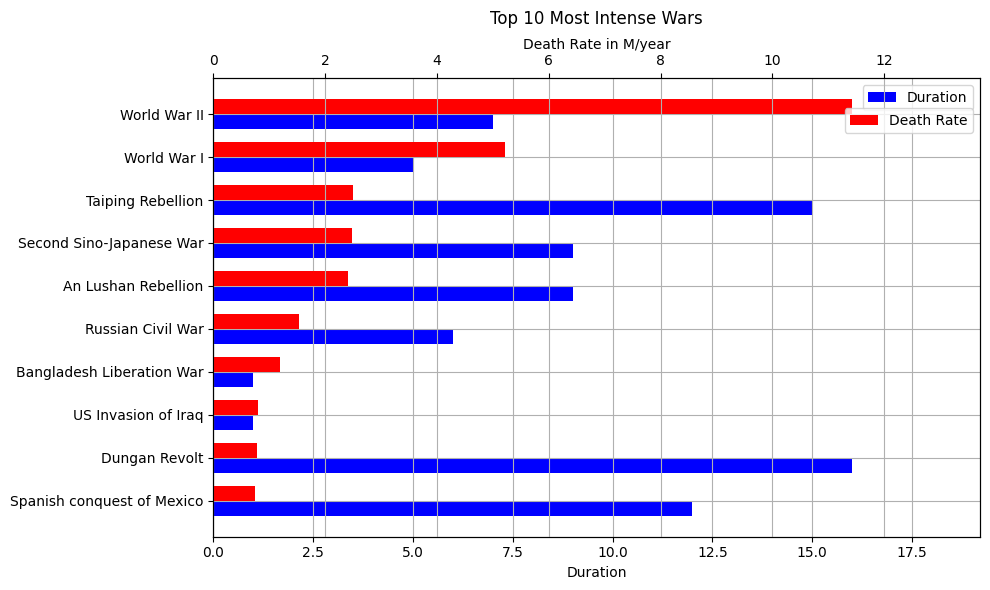

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
wars = intense_wars['War']
death_rates = intense_wars['deathRate']/1000000
durations = intense_wars['duration']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set title and labels
ax1.set_title('Top 10 Most Intense Wars', pad=10)
ax1.set_xlabel('Duration')
#ax1.set_ylabel('Wars')

# Define the width of each bar
bar_width = 0.35

# Create index for the y-axis
index = np.arange(len(wars))

# Plot duration bars
ax1.barh(index - bar_width / 2, durations, bar_width, color='blue', label='Duration')

# Create another axis for death rate with a different scale
ax2 = ax1.twiny()

# Set labels for the second axis
ax2.set_xlabel('Death Rate in M/year')

# Plot death rate bars
ax2.barh(index + bar_width / 2, death_rates, bar_width, color='red', label='Death Rate')

# Set y-axis ticks and labels
ax1.set_yticks(index)
ax1.set_yticklabels(wars)

# Adjust the limits of both axes to make them visible
max_duration = max(durations)
max_death_rate = max(death_rates)
ax1.set_xlim(0, max_duration * 1.2)
ax2.set_xlim(0, max_death_rate * 1.2)

# Show legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))  # Adjust legend position


# Add grid
ax1.grid(True)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#reverse the sorting

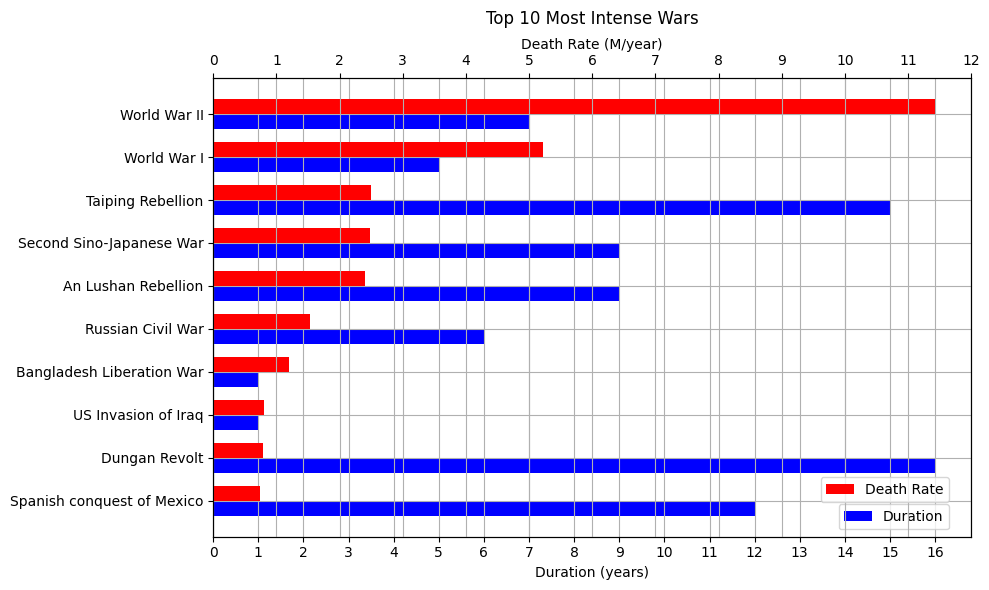

In [23]:
import numpy as np
import matplotlib.pyplot as plt



# Data for plotting
wars = intense_wars['War']
death_rates = intense_wars['deathRate'] / 1000000
durations = intense_wars['duration']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set title and labels
ax1.set_title('Top 10 Most Intense Wars', pad=10)
ax1.set_xlabel('Duration (years)')
#ax1.set_ylabel('Wars')

# Define the width of each bar
bar_width = 0.35

# Create index for the y-axis
index = np.arange(len(wars))

# Plot duration bars
ax1.barh(index - bar_width / 2, durations, bar_width, color='blue', label='Duration')

# Create another axis for death rate with a different scale
ax2 = ax1.twiny()

# Set labels for the second axis
ax2.set_xlabel('Death Rate (M/year)')

# Plot death rate bars
ax2.barh(index + bar_width / 2, death_rates, bar_width, color='red', label='Death Rate')

# Set y-axis ticks and labels
ax1.set_yticks(index)
ax1.set_yticklabels(wars)

# Set x-axis ticks every 1 point
ax1.set_xticks(np.arange(0, max(durations) + 1, 1))
ax2.set_xticks(np.arange(0, max(death_rates) + 1, 1))


# Adjust the limits of both axes to make them visible
# max_duration = max(durations)
# max_death_rate = max(death_rates)
# ax1.set_xlim(0, max_duration * 1.2)
# ax2.set_xlim(0, max_death_rate * 1.2)

# Show legend
ax1.legend(loc='lower right', bbox_to_anchor=(0.98, 0.001))
ax2.legend(loc='lower right', bbox_to_anchor=(0.98, 0.06))  # Adjust legend position

# Add grid
ax1.grid(True)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Reverse the sorting

In [24]:
sorted_df = df.sort_values(by='duration', ascending=False)
sorted_df.head(15)

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
23,Reconquista,False,7000000,7000000,711,1492,Spanish and Portuguese Christian states vs. Sp...,Iberian Peninsula,7.000000e+06,782,8951.406650
22,Arab–Byzantine Wars,False,2000000,2000000,629,1050,Byzantine Empire and allies vs. Islamic Empire...,Middle East / North Africa / Southern Europe,2.000000e+06,422,4739.336493
1,Chinese Warring States,True,1500000,1500000,475,221,Seven great powers of China,China,1.500000e+06,255,5882.352941
44,Arauco War,False,125000,142000,1550,1790,Spanish Empire vs. Mapuches,Chile,1.332291e+05,241,552.817950
28,Crusades,False,1000000,3000000,1095,1291,"Originally Byzantine Empire vs. Seljuq Empire,...","Europe / Middle East (""Holy Land"")",1.732051e+06,197,8792.136079
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,3.464102e+07,163,212521.571481
20,Wars of the Sixteen Kingdoms,False,150000,150000,304,439,Northern Chinese States,Northern China,1.500000e+05,136,1102.941176
12,Punic Wars,True,1620000,1920000,264,146,Roman Republic vs. Carthaginian Empire,Western Europe / North Africa,1.763633e+06,119,14820.442141
32,Hundred Years' War,False,2300000,3500000,1337,1453,House of Valois vs. House of Plantagenet,Western Europe,2.837252e+06,117,24250.018734
113,Kurdish separatism in Iran,False,15000,58000,1918,2024,Qajar dynasty vs. Shekak (tribe),Iran,2.949576e+04,107,275.661331


In [25]:
#https://www.reddit.com/r/learnpython/comments/p3cmgh/easy_alternative_to_matplotlib/

### After reddit feedback

https://www.reddit.com/r/dataisbeautiful/comments/1c9f3zz/oc_war_intensity_m_deathsyear_and_duration/?sort=old

- use scatterplot with x duration, y death rate
- Iraq invasion data point is wrong, it shows death numbers for invasion and occupation but time for only invasion
- for wars taking only a few months rounding to 1 y may be too crude
- duration of WW2 should be 8y?

1. Fix Iraq invasion datapoint

The Iraq War (Arabic: حرب العراق, romanized: ḥarb al-ʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011.

---
The original table includes US invasion of Iraq as well as The Iraq War: remove the Invasion entry as it's included in the Iraq War. Also, remove War on Terror as it includes many wars already present as separate datapoints.

In [26]:
df = df[df['War'] != "US Invasion of Iraq"]
df = df[df['War'] != "War on terror"]



2. Delete wars that were part of WW2 ?

3. Delete wars that were part of Napoleonic Wars ?

Maybe just acknowledge part of war x...

In [27]:
sorted_df = df.sort_values(by='deathRate', ascending=False)
top20Deadliest =sorted_df.head(20)

In [192]:
df.sort_values(by='deathRate', ascending=False).head(30)


,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,80000000.00,7,11428571.43
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,26076809.62,5,5215361.92
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,37416573.87,15,2494438.26
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,22360679.77,9,2484519.97
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan state,China,21633307.65,9,2403700.85
112,Russian Civil War,False,7000000,12000000,1917,1922,Red army and allies vs. White army and allies,Russia,9165151.39,6,1527525.23
150,Bangladesh Liberation War,False,400000,3600000,1971,1971,India and Bangladesh vs. Pakistan,Bangladesh,1200000.00,1,1200000.00
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,12649110.64,16,790569.42
38,Spanish conquest of Mexico,False,8000000,10000000,1519,1530,Spanish Empire vs. Aztec Empire,Mexico,8944271.91,12,745355.99
136,Korean War,False,1500000,4500000,1950,1953,South Korea and allies vs. North Korea and allies,Korea,2598076.21,4,649519.05


In [28]:
top20Deadliest

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,8.000000e+07,7,1.142857e+07
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,2.607681e+07,5,5.215362e+06
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,3.741657e+07,15,2.494438e+06
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,2.236068e+07,9,2.484520e+06
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,2.163331e+07,9,2.403701e+06
112,Russian Civil War,False,7000000,12000000,1917,1922,Red army and allies vs. White army and allies,Russia,9.165151e+06,6,1.527525e+06
150,Bangladesh Liberation War,False,400000,3600000,1971,1971,India and Bangladesh vs. Pakistan,Bangladesh,1.200000e+06,1,1.200000e+06
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,1.264911e+07,16,7.905694e+05
38,Spanish conquest of Mexico,False,8000000,10000000,1519,1530,Spanish Empire vs. Aztec Empire,Mexico,8.944272e+06,12,7.453560e+05
136,Korean War,False,1500000,4500000,1950,1953,South Korea and allies vs. North Korea and allies,Korea,2.598076e+06,4,6.495191e+05


In [29]:
def standard_notation_formatter(x):
    return f'{x:.2f}'  # Format the number with 2 decimal places

# Set the display format for float values to the custom formatter function
pd.options.display.float_format = standard_notation_formatter

In [30]:
def startEndRange(start, end):
    if start == end:
        return str(start)
    else:
        return f'({start}-{end})'
top20Deadliest['startEnd'] = top20Deadliest.apply(lambda row: startEndRange(row['startDate'], row['endDate']), axis=1)


C:\Users\karol\AppData\Local\Temp\ipykernel_42228\953407529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20Deadliest['startEnd'] = top20Deadliest.apply(lambda row: startEndRange(row['startDate'], row['endDate']), axis=1)


In [31]:
def deathRangeFormatted(deaths):
    deaths_rounded = round(deaths / 1000000, 1)  # Round to 1 decimal place
    return f'~{deaths_rounded} millions'
top20Deadliest['deathsFormatted'] = top20Deadliest.apply(lambda row: deathRangeFormatted(row['geom_mean']), axis=1)

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\2595241624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20Deadliest['deathsFormatted'] = top20Deadliest.apply(lambda row: deathRangeFormatted(row['geom_mean']), axis=1)


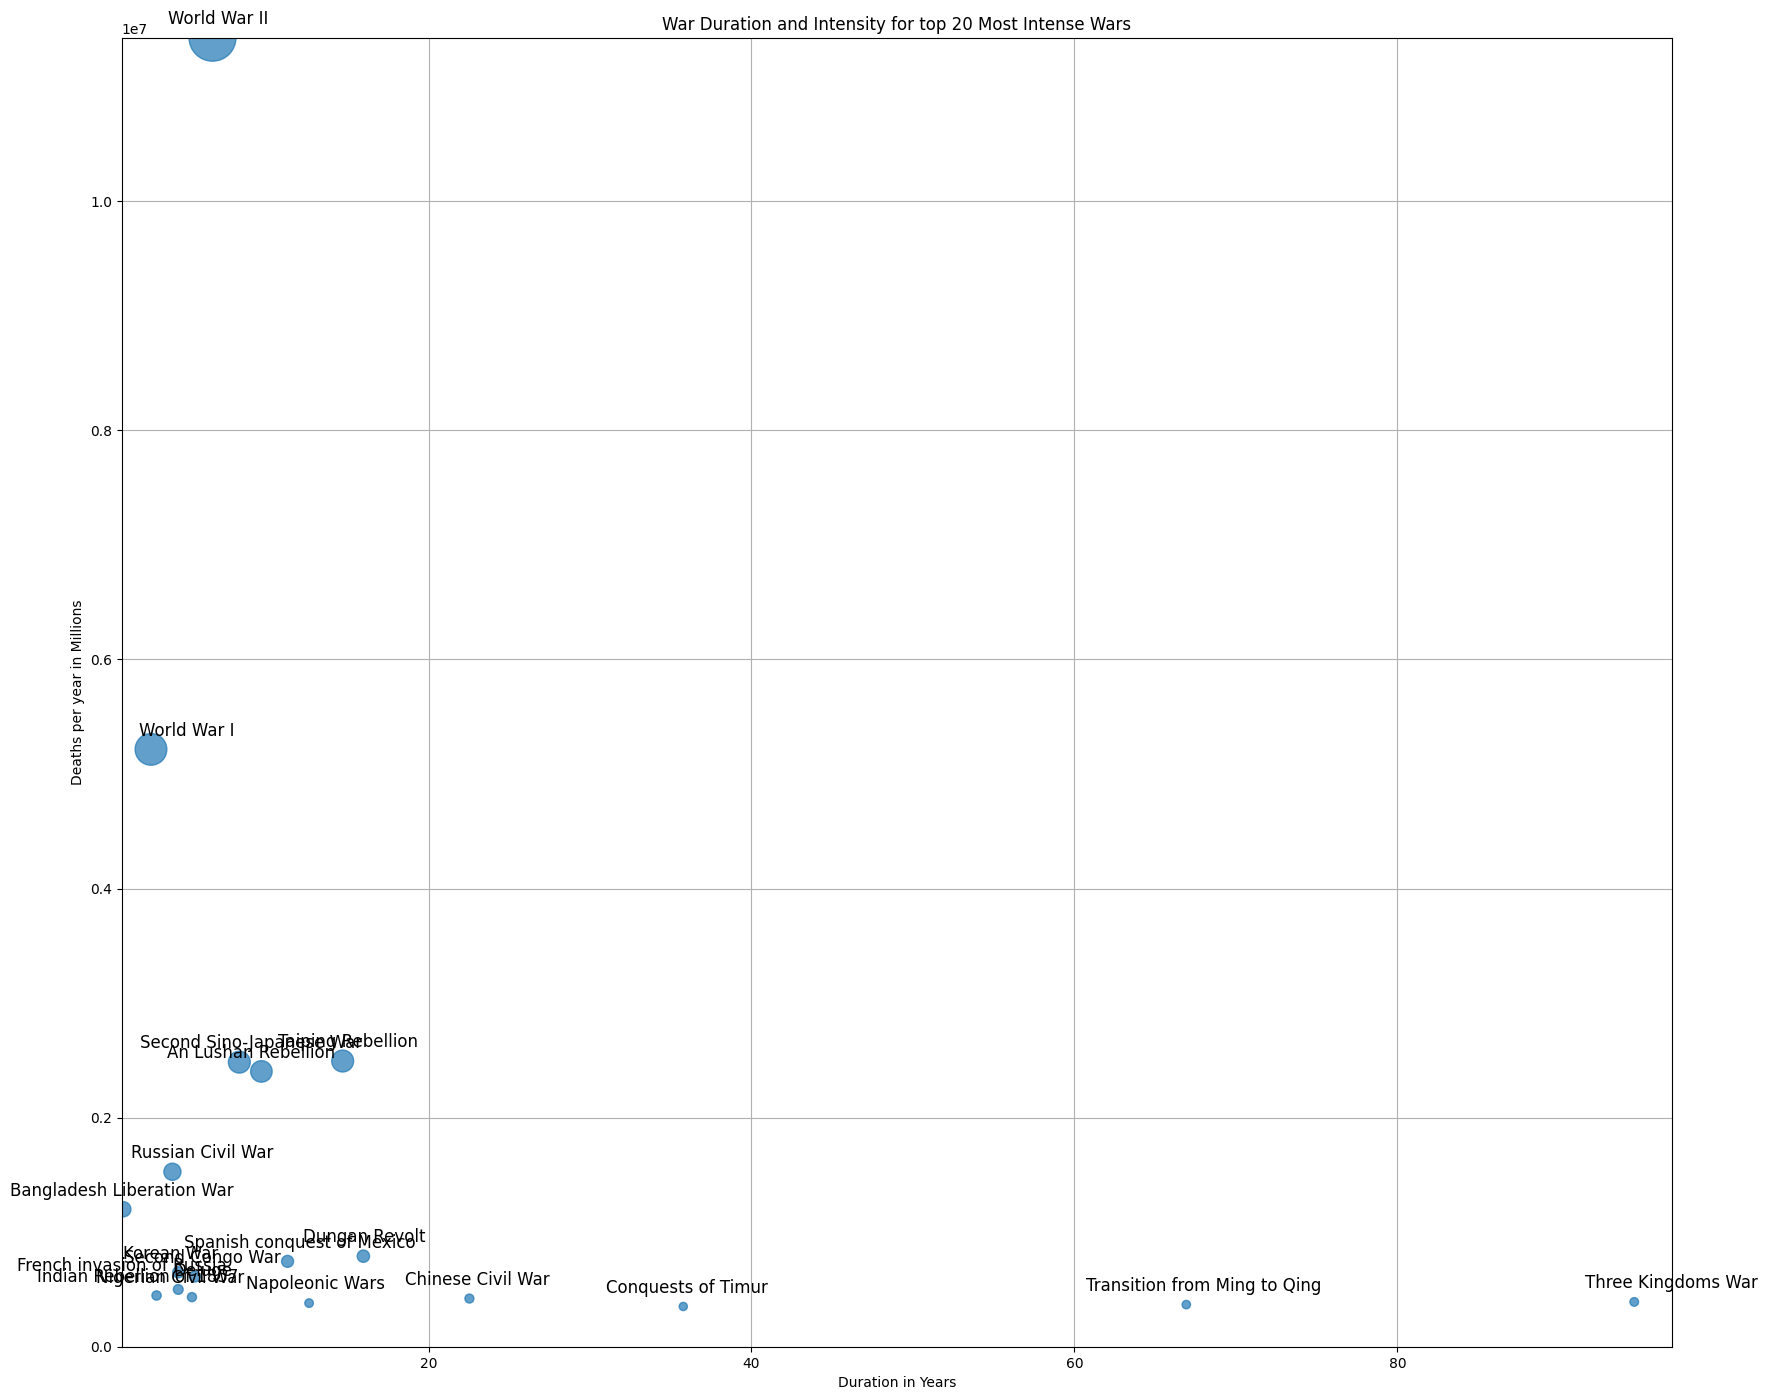

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter


# Filter data for BC and AD separately
#top20Deadliest = top20Deadliest[(top20Deadliest['War'] != 'World War II')&(top20Deadliest['War'] != 'World War I')]

plt.figure(figsize=(20, 17))

# Plot AD data
scatter = plt.scatter(top20Deadliest['duration']+ np.random.normal(0, size=len(top20Deadliest['duration'])), top20Deadliest['deathRate']+np.random.normal(0, size=len( top20Deadliest['deathRate'])), s= top20Deadliest['deathRate'] / 10000, alpha=0.7)


# Set custom limits for better visibility
plt.xlim(min(top20Deadliest['duration']), max(top20Deadliest['duration']))
plt.ylim(0, max( top20Deadliest['deathRate']))  # Adjusted upper limit up to 9M

# Add ticks every 50 years starting from 0 to 2100
#plt.xticks(range(100, 2100, 100))

#Add 'war' field as multiline text on each bubble
for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['War']):
    plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black')
    
    
# for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['War']):
#     if len(war)>1:
#         lines = war.split()
#         text = '\n'.join(lines)
#     else:
#         text = war
#     plt.annotate(text, (x, y), textcoords="offset points", xytext=(0, -17), ha='center', fontsize=12, color='black')

    
    

# Customize the plot
plt.title('War Duration and Intensity for top 20 Most Intense Wars')
plt.xlabel('Duration in Years')
plt.ylabel('Deaths per year in Millions')
#plt.legend()
plt.grid(True)

# Improve layout
# plt.tight_layout()

plt.show()

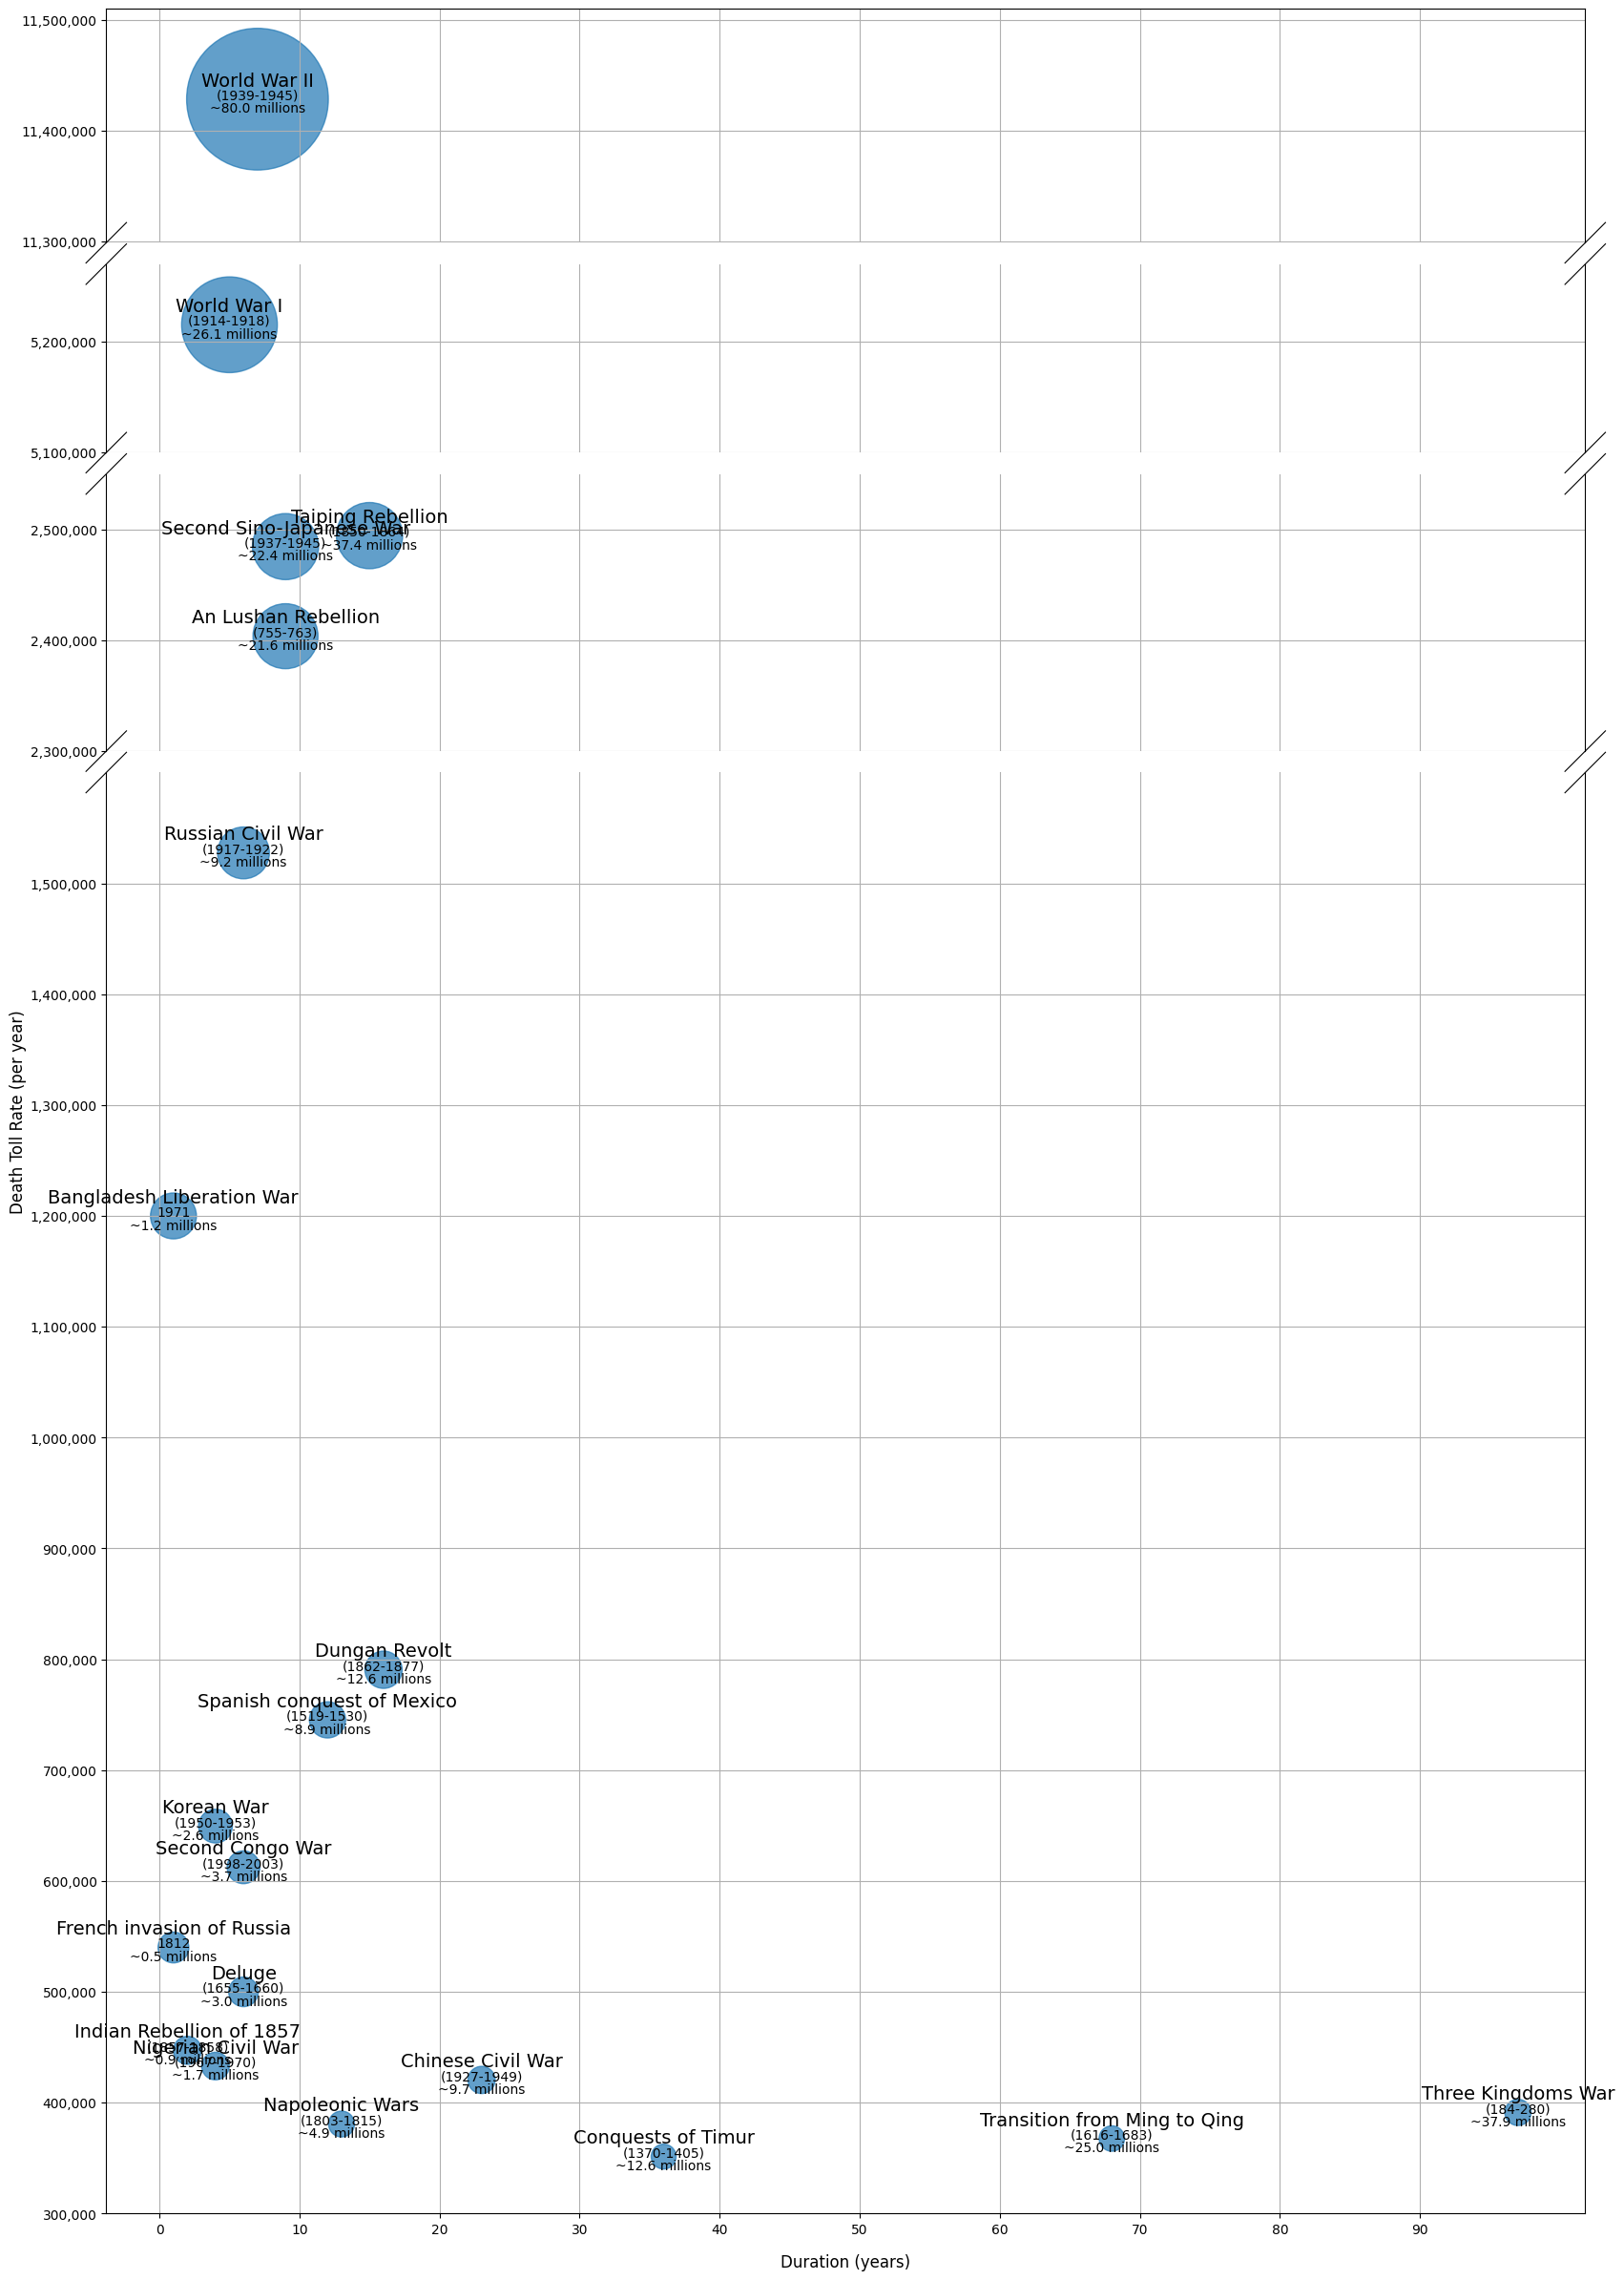

In [33]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# top20Deadliest is assumed to be your DataFrame containing the data

plt.figure(figsize=(20, 30))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((300000, 1600000),(2300000, 2550000), (5100000, 5270000), (11299000, 11510000)),
    hspace=.04,
    despine=False
)

# Scatter plot
bax.scatter(top20Deadliest['duration'], top20Deadliest['deathRate'], s=[size / 1000 for size in top20Deadliest['deathRate']], alpha=0.7)

for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['War']):
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')
for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['startEnd']):   
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=10, color='black')
for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['deathsFormatted']):   
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color='black')
    

# Set custom y-axis tick labels for each axis with thousands separators
for ax in bax.axs:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))

bax.axs[3].yaxis.set_ticks(np.arange(300000, 1600000, 100000))
bax.axs[2].yaxis.set_ticks(np.arange(2300000, 2550000, 100000))
bax.axs[1].yaxis.set_ticks(np.arange(5100000,5270000, 100000))
bax.axs[0].yaxis.set_ticks(np.arange(11300000,11510000, 100000)) 
#bax.set_title('Top 20 Most Intense Wars in History')
bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 100, 10))

plt.show()


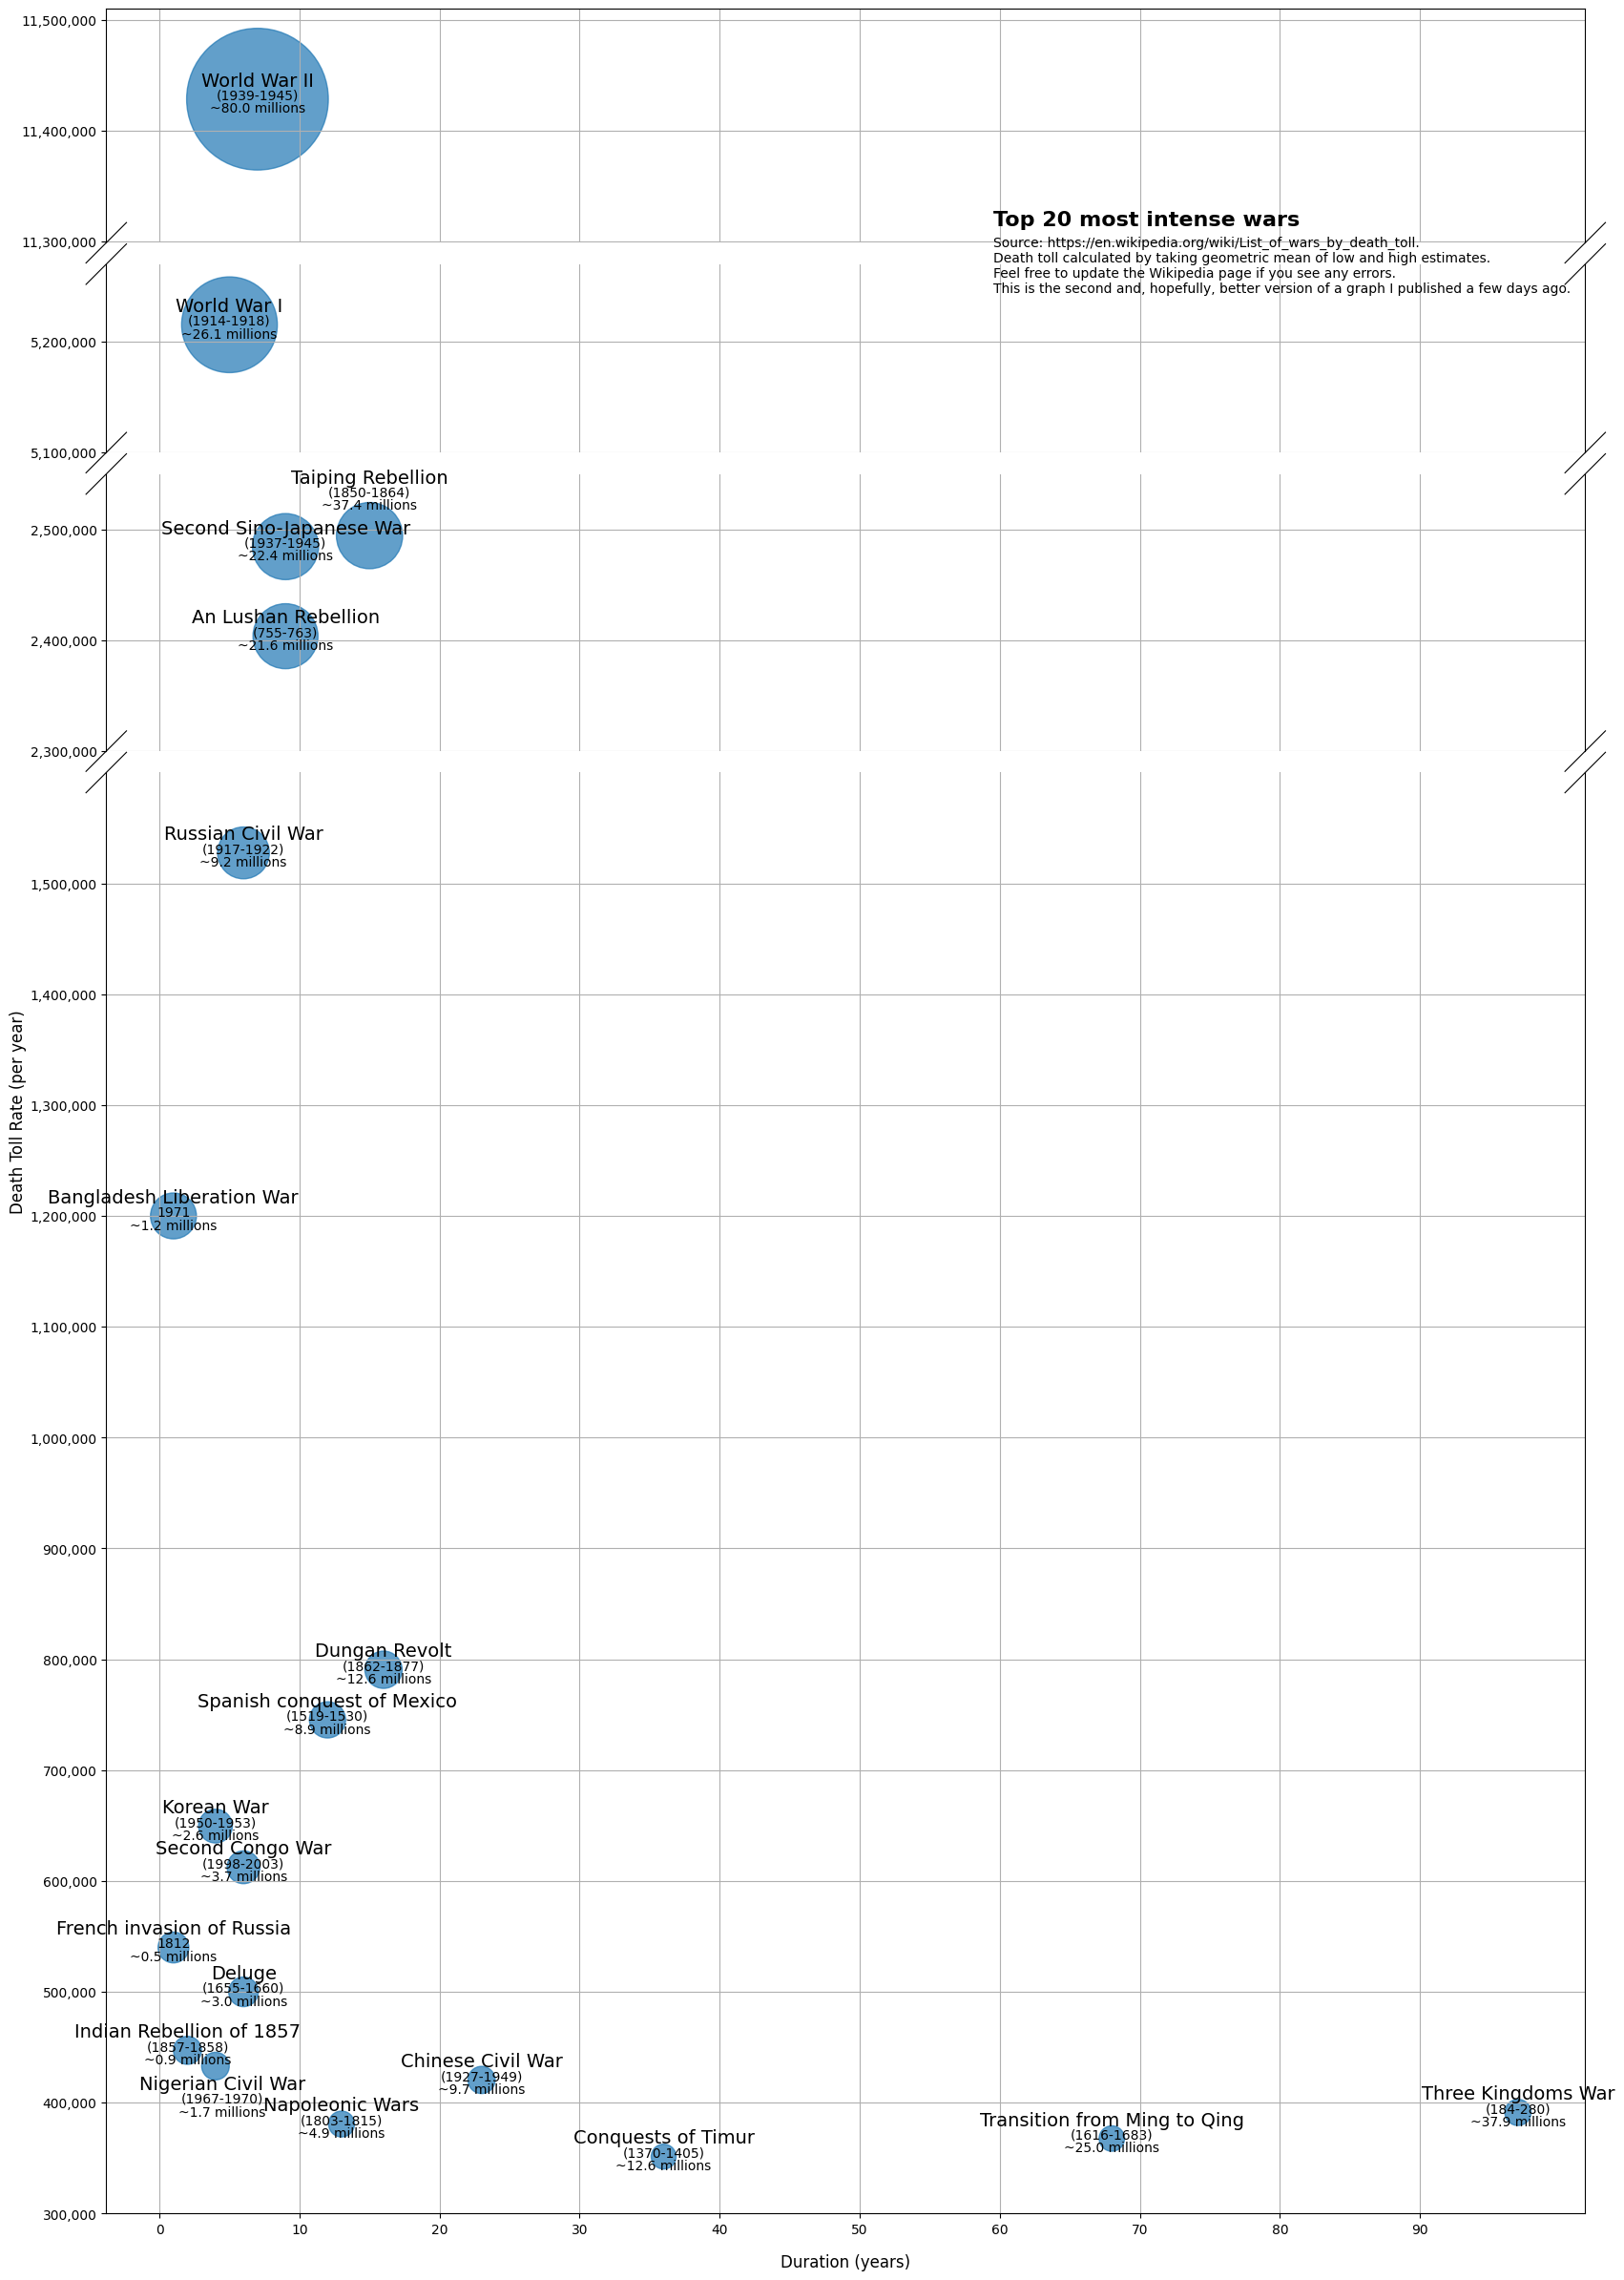

In [191]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# top20Deadliest is assumed to be your DataFrame containing the data

plt.figure(figsize=(20, 30))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((300000, 1600000),(2300000, 2550000), (5100000, 5270000), (11299000, 11510000)),
    hspace=.04,
    despine=False
)

    
    # Manually adjust the position of specific labels
label_adjustments = {
   
 'Taiping Rebellion': (15, 2530000), 
'Nigerian Civil War': (4.5,400000)	}  # Adjust coordinates as needed


wars_to_annotate = top20Deadliest[~top20Deadliest['War'].isin(label_adjustments.keys())]

# Scatter plot
bax.scatter(top20Deadliest['duration'], top20Deadliest['deathRate'], s=[size / 1000 for size in top20Deadliest['deathRate']], alpha=0.7)

for x, y, war in zip(wars_to_annotate['duration'], wars_to_annotate['deathRate'], wars_to_annotate['War']):
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')
for x, y, war in zip(wars_to_annotate['duration'], wars_to_annotate['deathRate'], wars_to_annotate['startEnd']):   
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=10, color='black')
for x, y, war in zip(wars_to_annotate['duration'], wars_to_annotate['deathRate'], wars_to_annotate['deathsFormatted']):   
    bax.annotate(war, (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color='black')
    
# Manually adjust the position of specific labels
for label, (x_pos, y_pos) in label_adjustments.items():
    bax.annotate(label, (x_pos, y_pos), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black') #color='red'   
    start_end_value = top20Deadliest.loc[top20Deadliest['War'] == label, 'startEnd'].iloc[0]
    bax.annotate(start_end_value, (x_pos, y_pos), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=10, color='black')
    deaths_f = top20Deadliest.loc[top20Deadliest['War'] == label, 'deathsFormatted'].iloc[0]
    bax.annotate(deaths_f, (x_pos, y_pos), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color='black')




    
# Set custom y-axis tick labels for each axis with thousands separators
for ax in bax.axs:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))

bax.axs[3].yaxis.set_ticks(np.arange(300000, 1600000, 100000))
bax.axs[2].yaxis.set_ticks(np.arange(2300000, 2550000, 100000))
bax.axs[1].yaxis.set_ticks(np.arange(5100000,5270000, 100000))
bax.axs[0].yaxis.set_ticks(np.arange(11300000,11510000, 100000)) 
#bax.set_title('Top 20 Most Intense Wars in History')
bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 100, 10))
    
# Add text to the legend
heading_text = "Top 20 most intense wars"

extra_text = "Source: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll.\nDeath toll calculated by taking geometric mean of low and high estimates.\nFeel free to update the Wikipedia page if you see any errors.\nThis is the second and, hopefully, better version of a graph I published a few days ago."
#plt.text(0, 0, extra_text, ha='left', va='bottom')
plt.text(0.6, 0.90, heading_text, fontsize=16, fontweight='bold', ha='left', va='bottom', transform=plt.gca().transAxes)

plt.text(0.6, 0.87, extra_text, fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes)

plt.show()

In [34]:
#add year
#top longest wars
# Filter the DataFrame where 'BC' is False
filtered_df = df[df['BC'] == False]

# Sort the filtered DataFrame by 'duration' column in descending order
sorted_df_longest = filtered_df.sort_values(by='duration', ascending=False)

# Select the top 30 rows from the sorted DataFrame
top30Longest = sorted_df_longest.head(30)
#add combatants and location

In [35]:
top30Longest

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
23,Reconquista,False,7000000,7000000,711,1492,Spanish and Portuguese Christian states vs. Sp...,Iberian Peninsula,7000000.00,782,8951.41
22,Arab–Byzantine Wars,False,2000000,2000000,629,1050,Byzantine Empire and allies vs. Islamic Empire...,Middle East / North Africa / Southern Europe,2000000.00,422,4739.34
44,Arauco War,False,125000,142000,1550,1790,Spanish Empire vs. Mapuches,Chile,133229.13,241,552.82
28,Crusades,False,1000000,3000000,1095,1291,"Originally Byzantine Empire vs. Seljuq Empire,...","Europe / Middle East (""Holy Land"")",1732050.81,197,8792.14
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,34641016.15,163,212521.57
20,Wars of the Sixteen Kingdoms,False,150000,150000,304,439,Northern Chinese States,Northern China,150000.00,136,1102.94
32,Hundred Years' War,False,2300000,3500000,1337,1453,House of Valois vs. House of Plantagenet,Western Europe,2837252.19,117,24250.02
113,Kurdish separatism in Iran,False,15000,58000,1918,2024,Qajar dynasty vs. Shekak (tribe),Iran,29495.76,107,275.66
35,Mediterranean War,False,900000,1000000,1470,1574,"Republic of Venice, Spain, Republic of Genoa, ...",Mediterranean,948683.30,105,9035.08
116,Kurdish–Turkish conflict,False,100000,100000,1921,2024,Turkey vs. Kurdish people,Middle East,100000.00,104,961.54


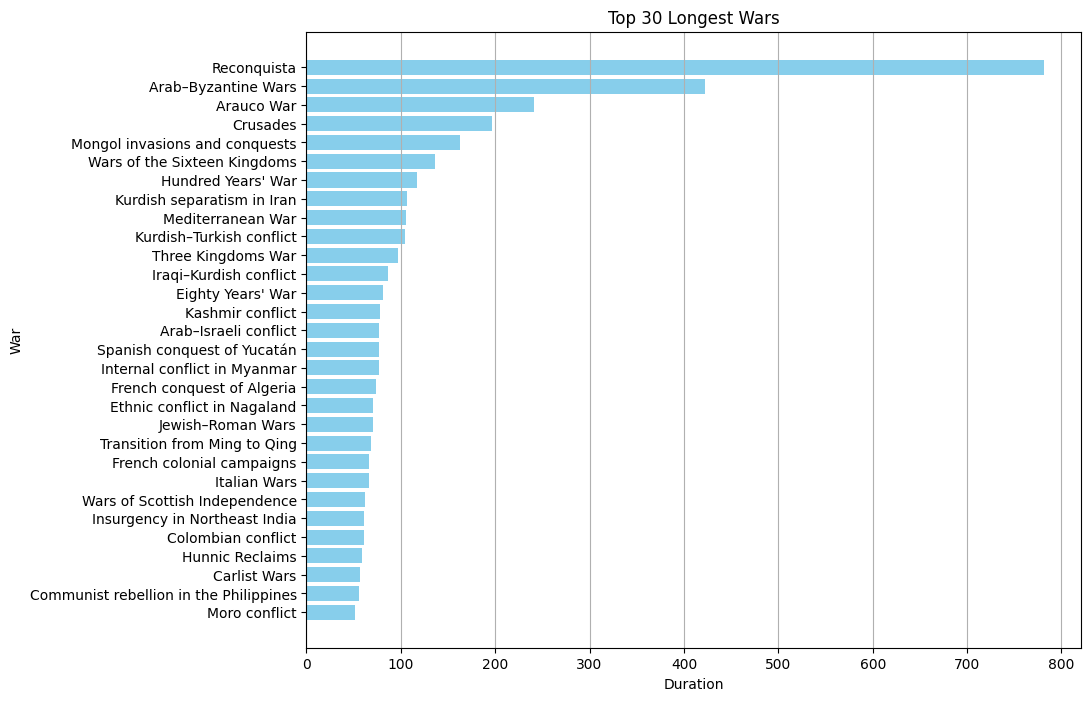

In [36]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue',height=0.8)
plt.xlabel('Duration')
plt.ylabel('War')
plt.title('Top 30 Longest Wars')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.show()

In [37]:
def startEndRange(start, end):
    if start == end:
        return str(start)
    else:
        return f'({start}-{end})'
top30Longest['startEnd'] = top30Longest.apply(lambda row: startEndRange(row['startDate'], row['endDate']), axis=1)

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\3015193217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30Longest['startEnd'] = top30Longest.apply(lambda row: startEndRange(row['startDate'], row['endDate']), axis=1)


C:\Users\karol\AppData\Local\Temp\ipykernel_42228\221218164.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


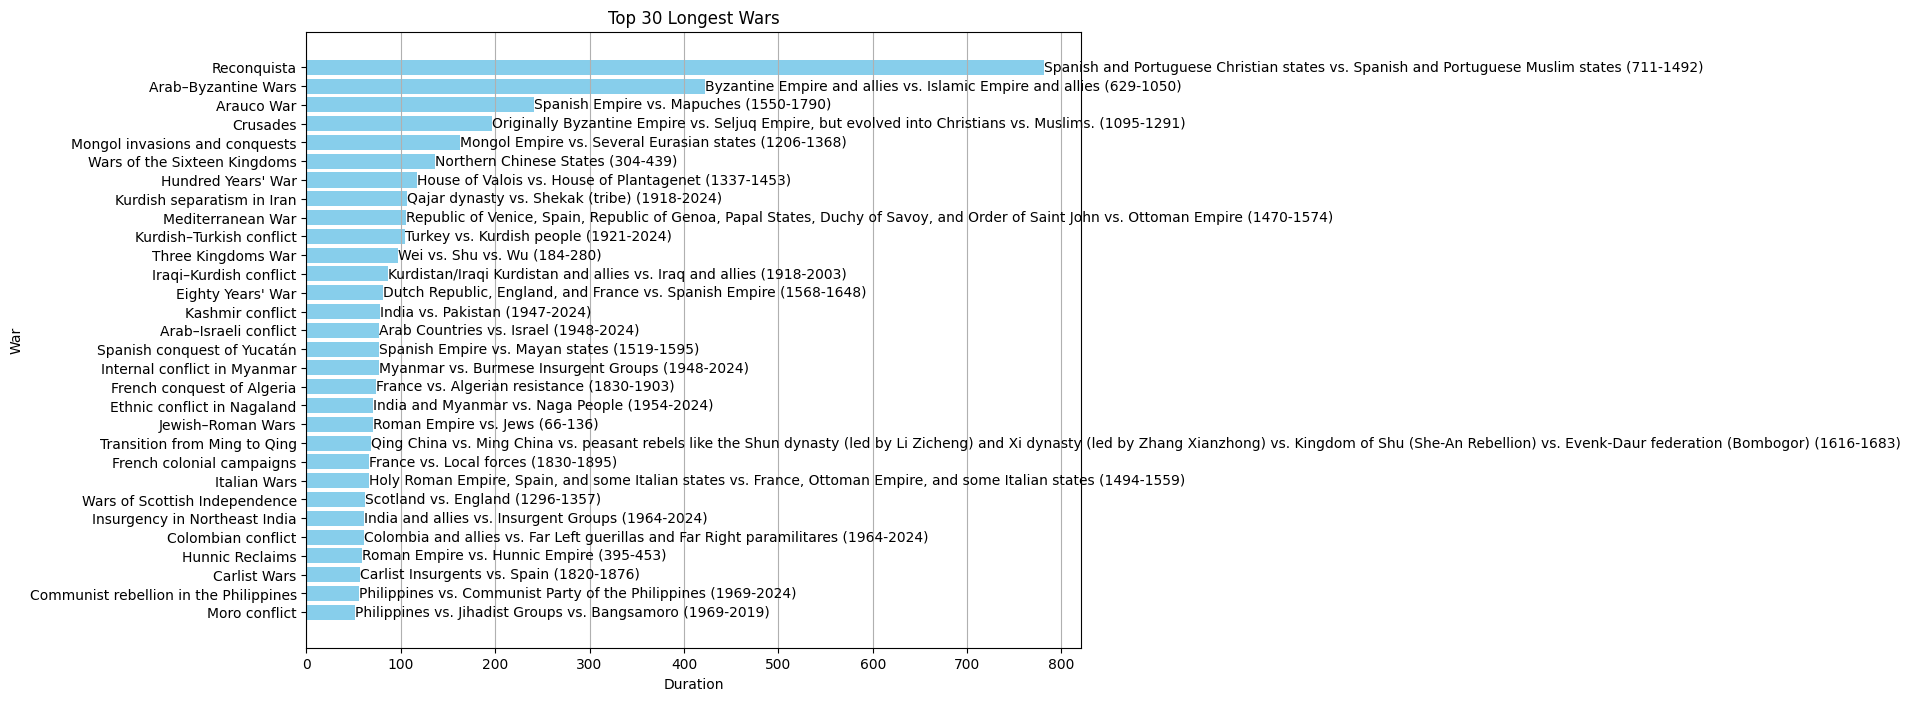

In [38]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(10, 8))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants and years information as annotations
for bar, combatants, years in zip(bars, top30Longest_sorted['Combatants'], top30Longest_sorted['startEnd']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{combatants} {years}', va='center')

plt.xlabel('Duration')
plt.ylabel('War')
plt.title('Top 30 Longest Wars')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\3063740971.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


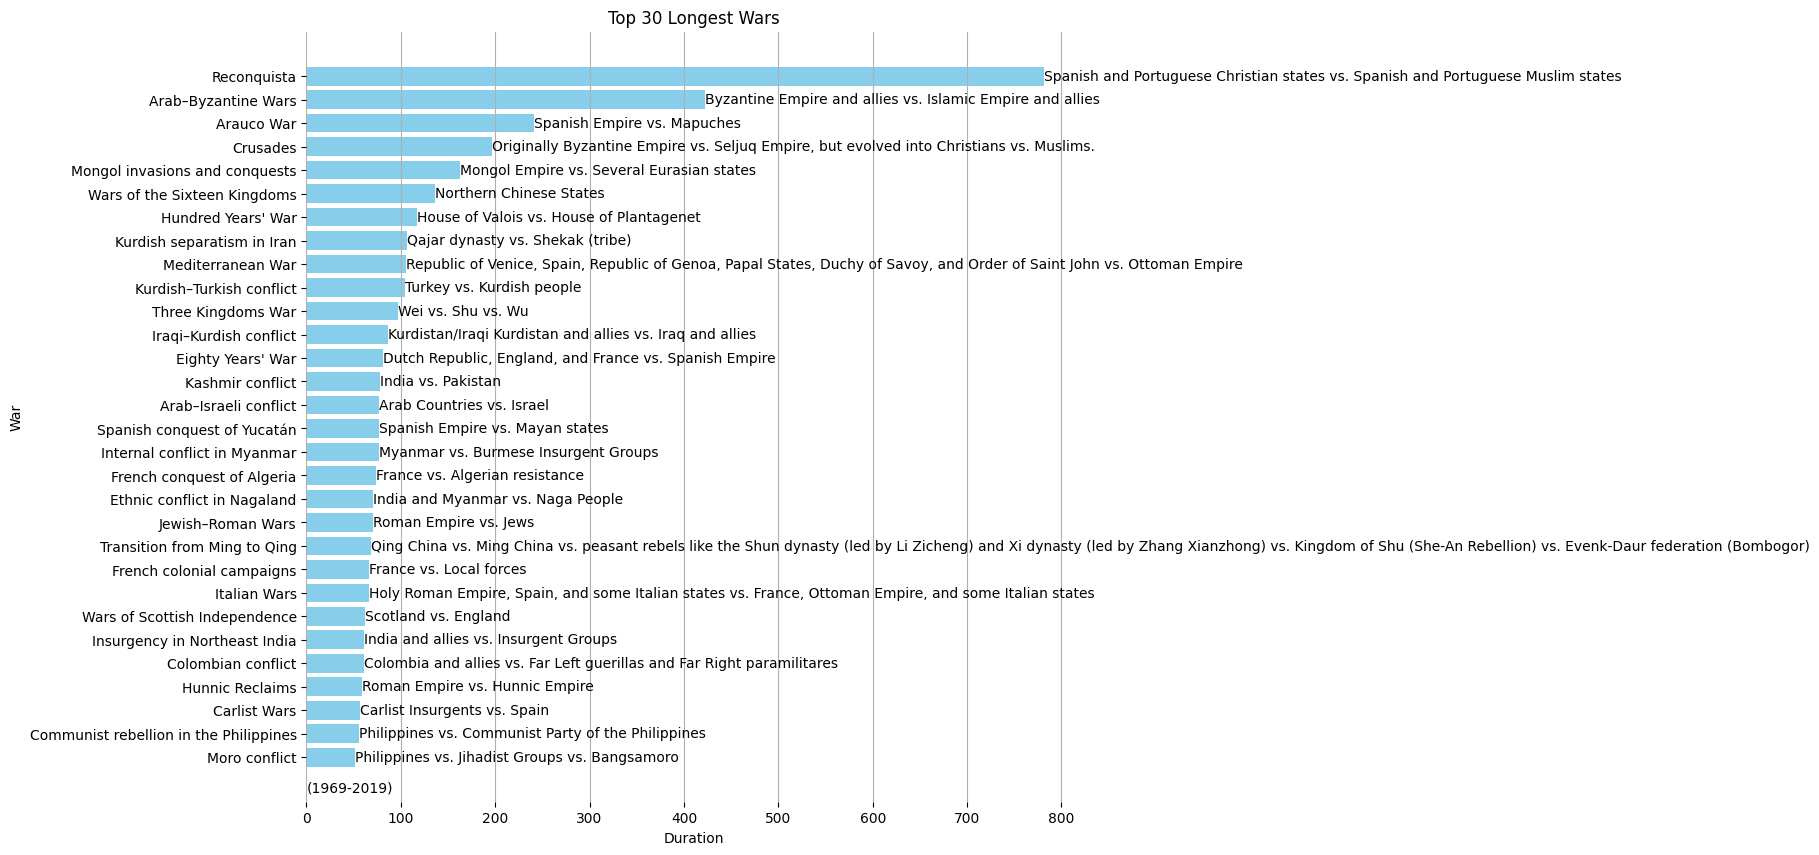

In [39]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(10, 10))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants information as annotations
for bar, combatants in zip(bars, top30Longest_sorted['Combatants']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, combatants, va='center')

# Set y-axis label
plt.ylabel('War')

# Add startEnd variable next to the y-axis label
plt.text(0, -1, top30Longest_sorted['startEnd'].iloc[0], va='top')  # Adjust the position and alignment as needed

plt.xlabel('Duration')
plt.title('Top 30 Longest Wars')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [40]:
pd.set_option('display.max_colwidth', None)

top30Longest.loc[top30Longest['War'] == 'Transition from Ming to Qing', 'Combatants']

50    Qing China vs. Ming China vs. peasant rebels like the Shun dynasty (led by Li Zicheng) and Xi dynasty (led by Zhang Xianzhong) vs. Kingdom of Shu (She-An Rebellion) vs. Evenk-Daur federation (Bombogor)
Name: Combatants, dtype: object

In [41]:
#adjust long combatants for 2 
top30Longest.loc[top30Longest['War'] == 'Reconquista', 'Combatants'] = 'Spanish and Portugese Christian vs. Muslim states'
#or
#top30Longest['Combatants'] = np.where(top30Longest['War'] == 'Reconquista', 'sdsefsf', top30Longest['Combatants'])
top30Longest.loc[top30Longest['War'] == 'Transition from Ming to Qing', 'Combatants'] = 'Qing China vs. Ming China vs. peasant rebels vs. Kingdom of Shu vs. Evenk-Daur federation'


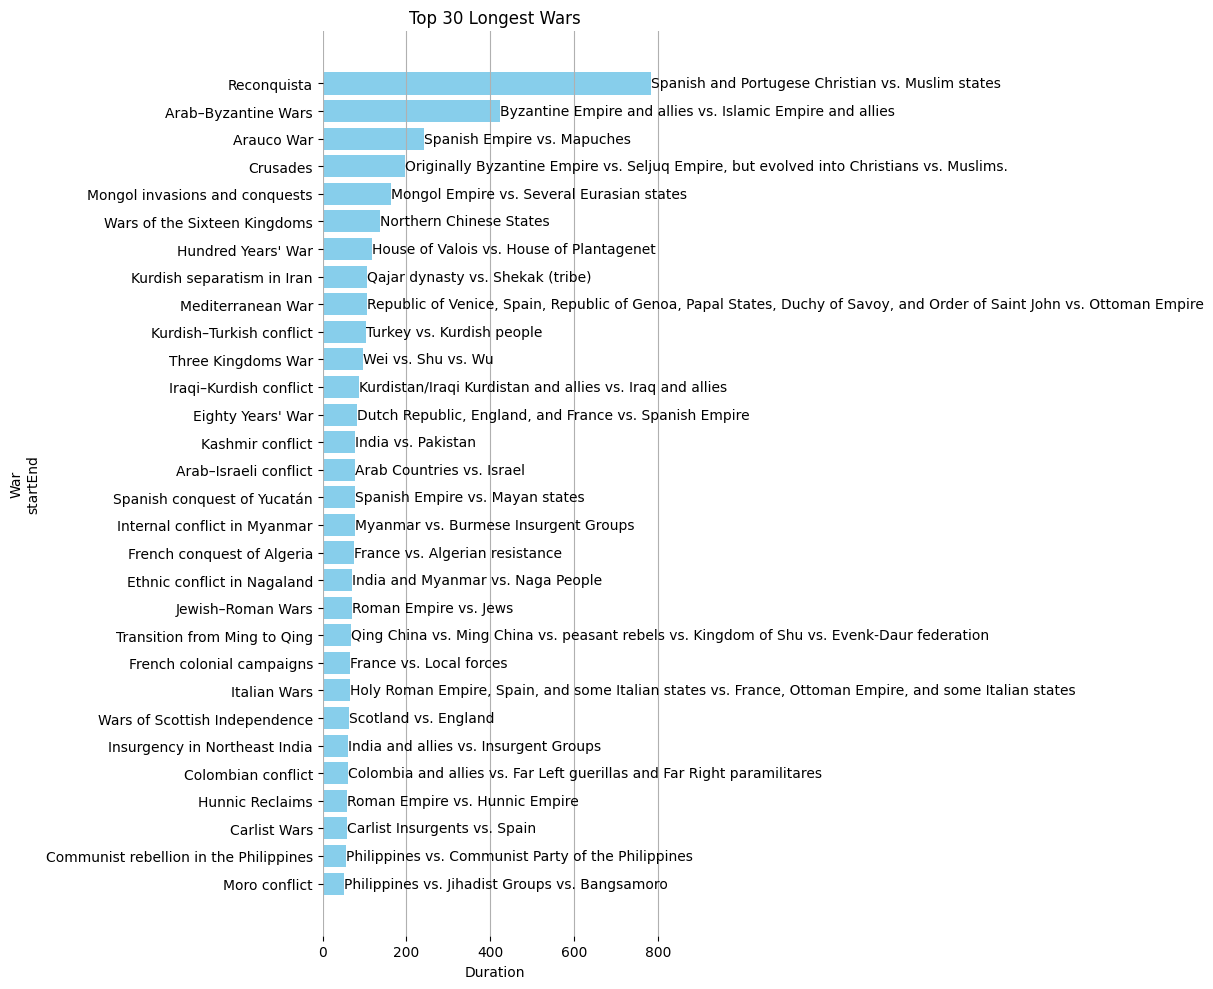

In [42]:
#add year to title
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(10, 10))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants information as annotations
for bar, combatants in zip(bars, top30Longest_sorted['Combatants']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, combatants, va='center')

# Set y-axis label with startEnd variable
plt.ylabel('War'+'\n'+'startEnd')

plt.xlabel('Duration')
plt.title('Top 30 Longest Wars')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

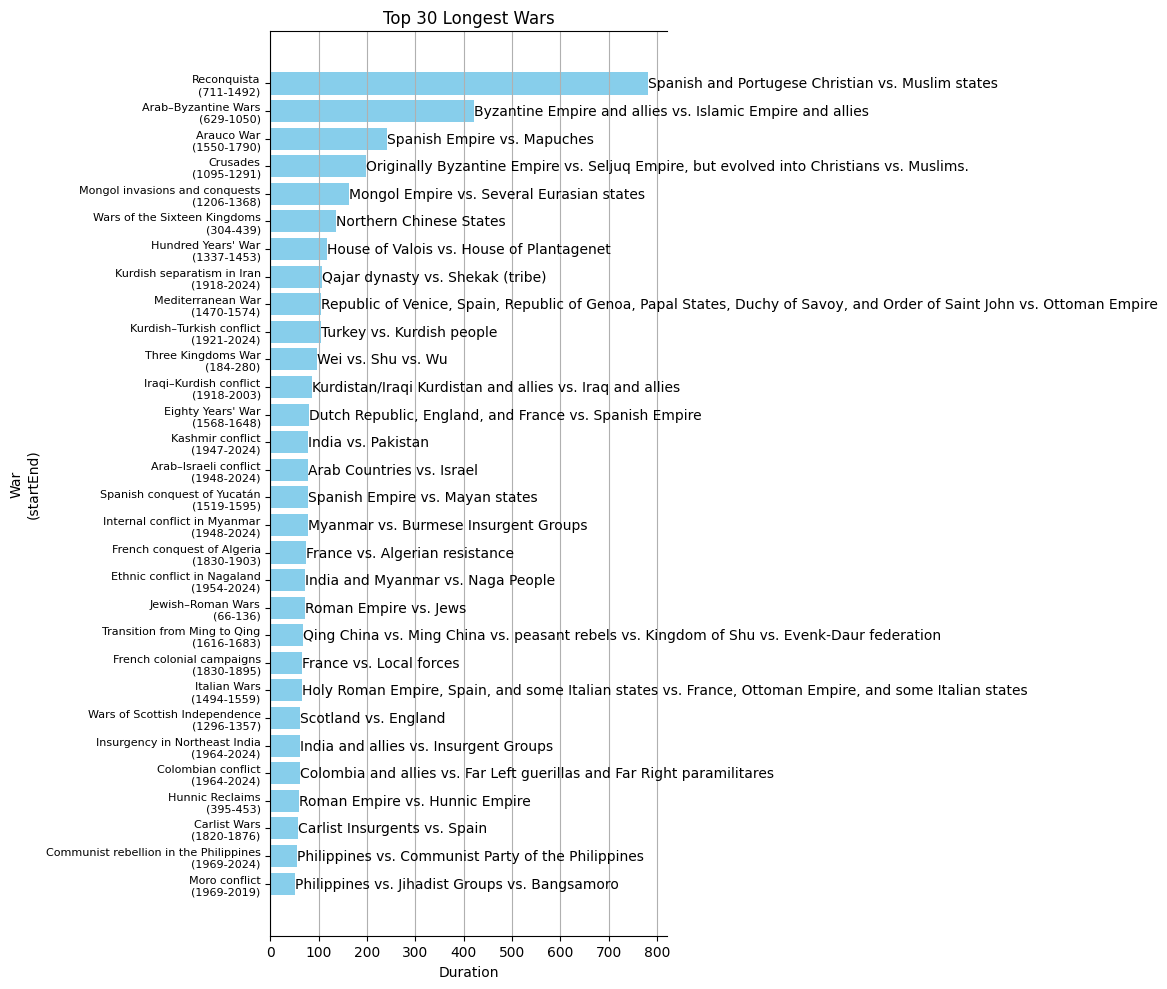

In [71]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(10, 10))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants information as annotations
for bar, combatants in zip(bars, top30Longest_sorted['Combatants']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, combatants, va='center')

# Set y-axis label
plt.ylabel('War\n(startEnd)')

plt.xlabel('Duration')
plt.title('Top 30 Longest Wars')
plt.grid(axis='x')  # Add grid lines on the x-axis
#plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
#plt.gca().spines['left'].set_visible(False)  # Hide the left spine
#plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine

# Set y-axis tick labels to include both 'War' and 'startEnd' information
#plt.yticks(ticks=range(len(top30Longest_sorted)), labels=[f'{war}\n{startEnd}' for war, startEnd in zip(top30Longest_sorted['War'], top30Longest_sorted['startEnd'])])
plt.yticks(ticks=range(len(top30Longest_sorted)), labels=[f'{war}\n{startEnd}' for war, startEnd in zip(top30Longest_sorted['War'], top30Longest_sorted['startEnd'])], fontsize=8)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

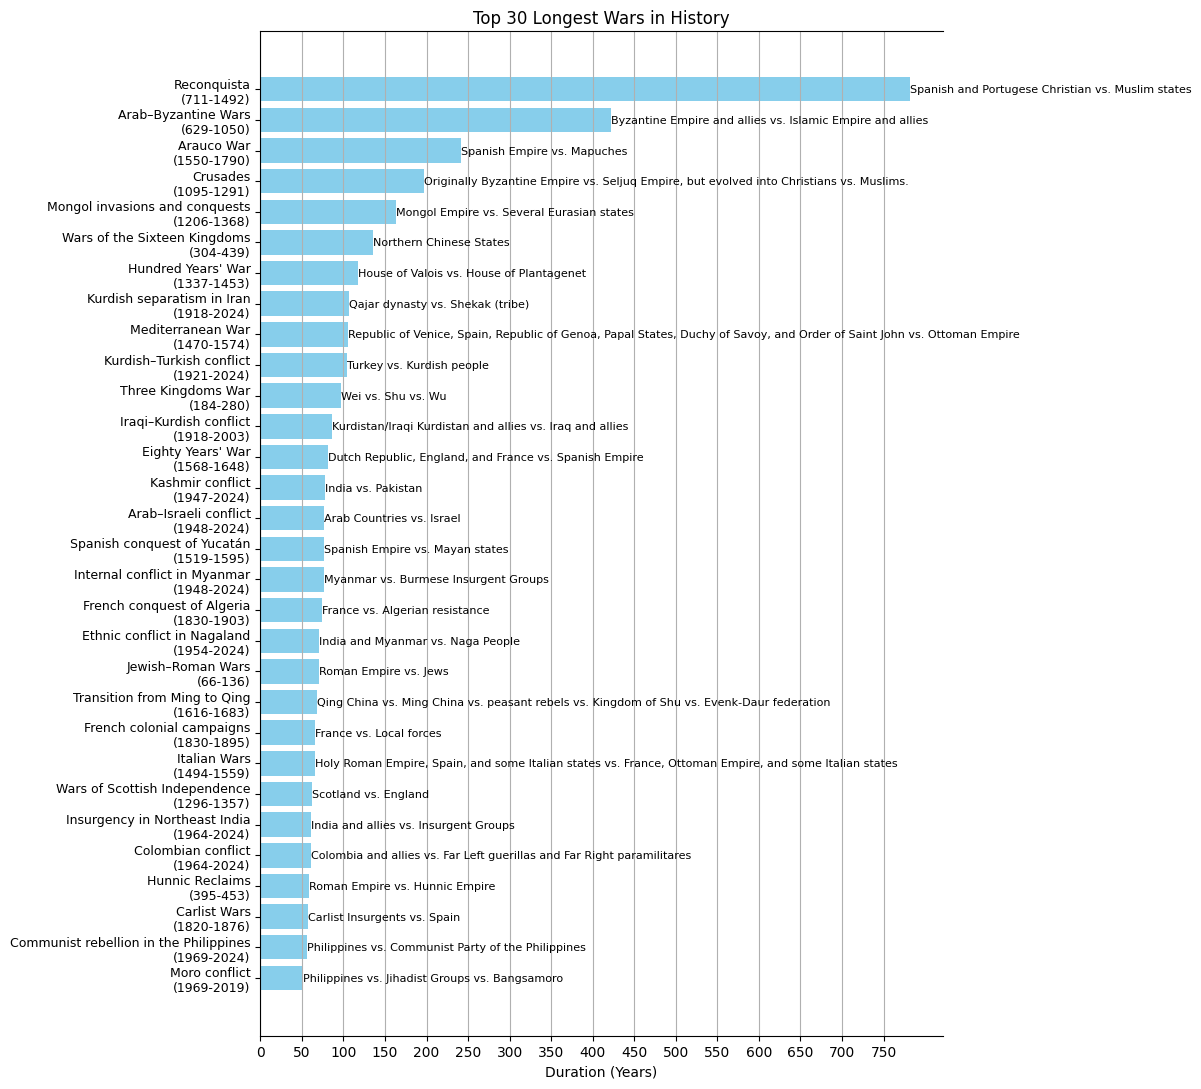

In [72]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(12, 11))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants information as annotations
for bar, combatants in zip(bars, top30Longest_sorted['Combatants']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, combatants, va='center', fontsize=8 )

# Set y-axis label
#plt.ylabel('War\n(startEnd)')

plt.xlabel('Duration (Years)')
plt.title('Top 30 Longest Wars in History')
plt.grid(axis='x')  # Add grid lines on the x-axis
#plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
#plt.gca().spines['left'].set_visible(False)  # Hide the left spine
#plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine

# Set y-axis tick labels to include both 'War' and 'startEnd' information with different font sizes
plt.yticks(ticks=range(len(top30Longest_sorted)), labels=[f'{war}\n{startEnd}' for war, startEnd in zip(top30Longest_sorted['War'], top30Longest_sorted['startEnd'])])
plt.tick_params(axis='y', labelsize=9)  # Set smaller font size for the y-axis tick labels
plt.xticks(range(0, int(max(top30Longest_sorted['duration'])) + 1, 50))

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

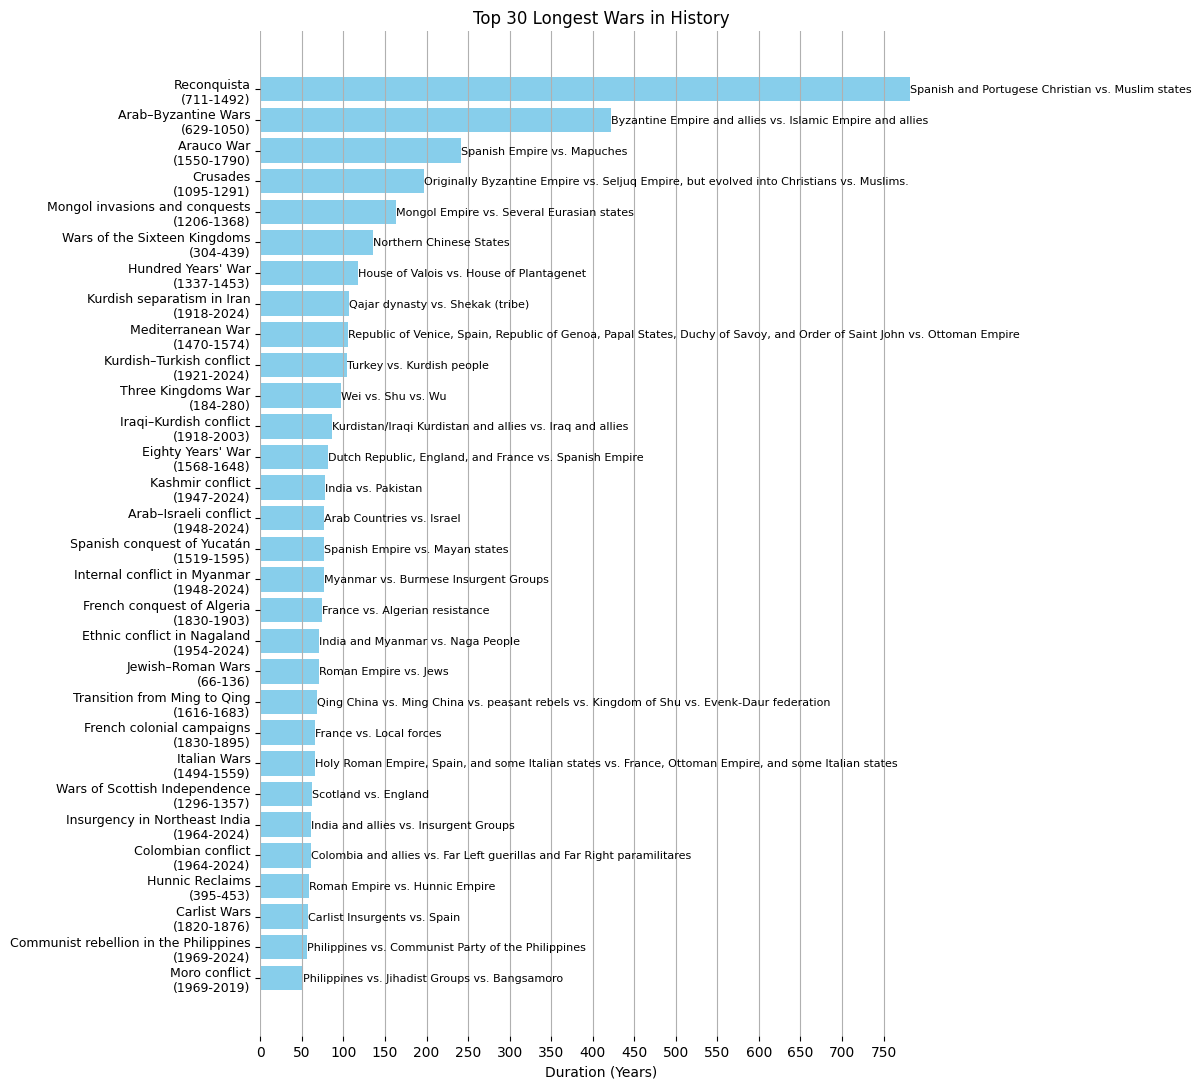

In [70]:
import matplotlib.pyplot as plt

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a horizontal bar plot with more space between bars
plt.figure(figsize=(12, 11))
bars = plt.barh(top30Longest_sorted['War'], top30Longest_sorted['duration'], color='skyblue', height=0.8)  # Adjust the height parameter

# Add combatants information as annotations
for bar, combatants in zip(bars, top30Longest_sorted['Combatants']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, combatants, va='center', fontsize=8)

# Set y-axis label
#plt.ylabel('War\n(startEnd)')

plt.xlabel('Duration (Years)')
plt.title('Top 30 Longest Wars in History')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine

# Set y-axis tick labels to include both 'War' and 'startEnd' information with different font sizes
plt.yticks(ticks=range(len(top30Longest_sorted)), labels=[f'{war}\n{startEnd}' for war, startEnd in zip(top30Longest_sorted['War'], top30Longest_sorted['startEnd'])])
plt.tick_params(axis='y', labelsize=9)  # Set smaller font size for the y-axis tick labels
plt.xticks(range(0, int(max(top30Longest_sorted['duration'])) + 1, 50))

plt.subplots_adjust(top=0.3)  # Adjust the top parameter to move the plot closer to the title
#plt.tight_layout(rect=[0, 0, 1, 0.8])  # Adjust the top margin to reduce the space

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

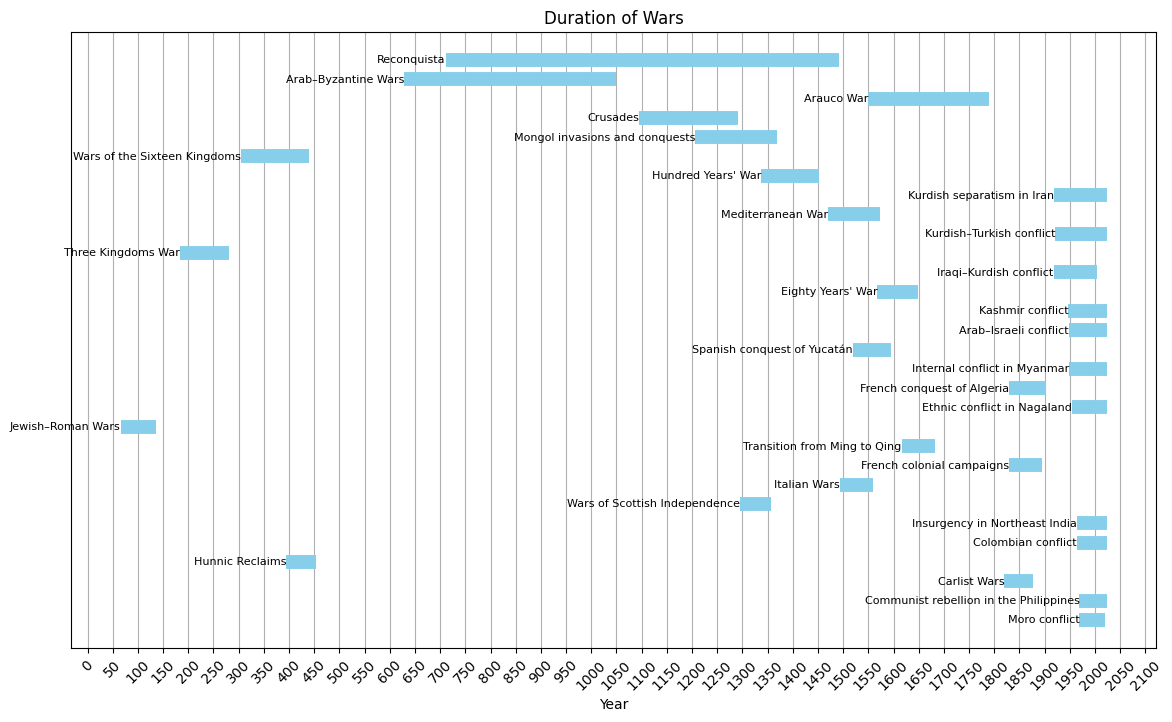

In [87]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 8))

# Plot horizontal lines representing the duration of wars
for idx, row in enumerate(top30Longest_sorted.iterrows()):
    ax.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='skyblue', linewidth=10)
    ax.text(row[1]['startDate'], idx, row[1]['War'], ha='right', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel('Year')
#ax.set_ylabel('War')
ax.set_title('Duration of Wars')

# Set y-axis ticks to evenly spaced positions
#ax.set_yticks(np.arange(len(top30Longest_sorted)))
# Set y-axis tick labels to be the war names
#ax.set_yticklabels(top30Longest_sorted['War'])

# Set x-axis ticks every 50 years
ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.set_xticks(range(0, max_year, 50)) 
# Set the angle of x-axis tick labels
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.xticks(rotation=45)
ax.yaxis.set_ticks([])



plt.show()

In [91]:
#top 50
top50Longest = sorted_df_longest.head(80)


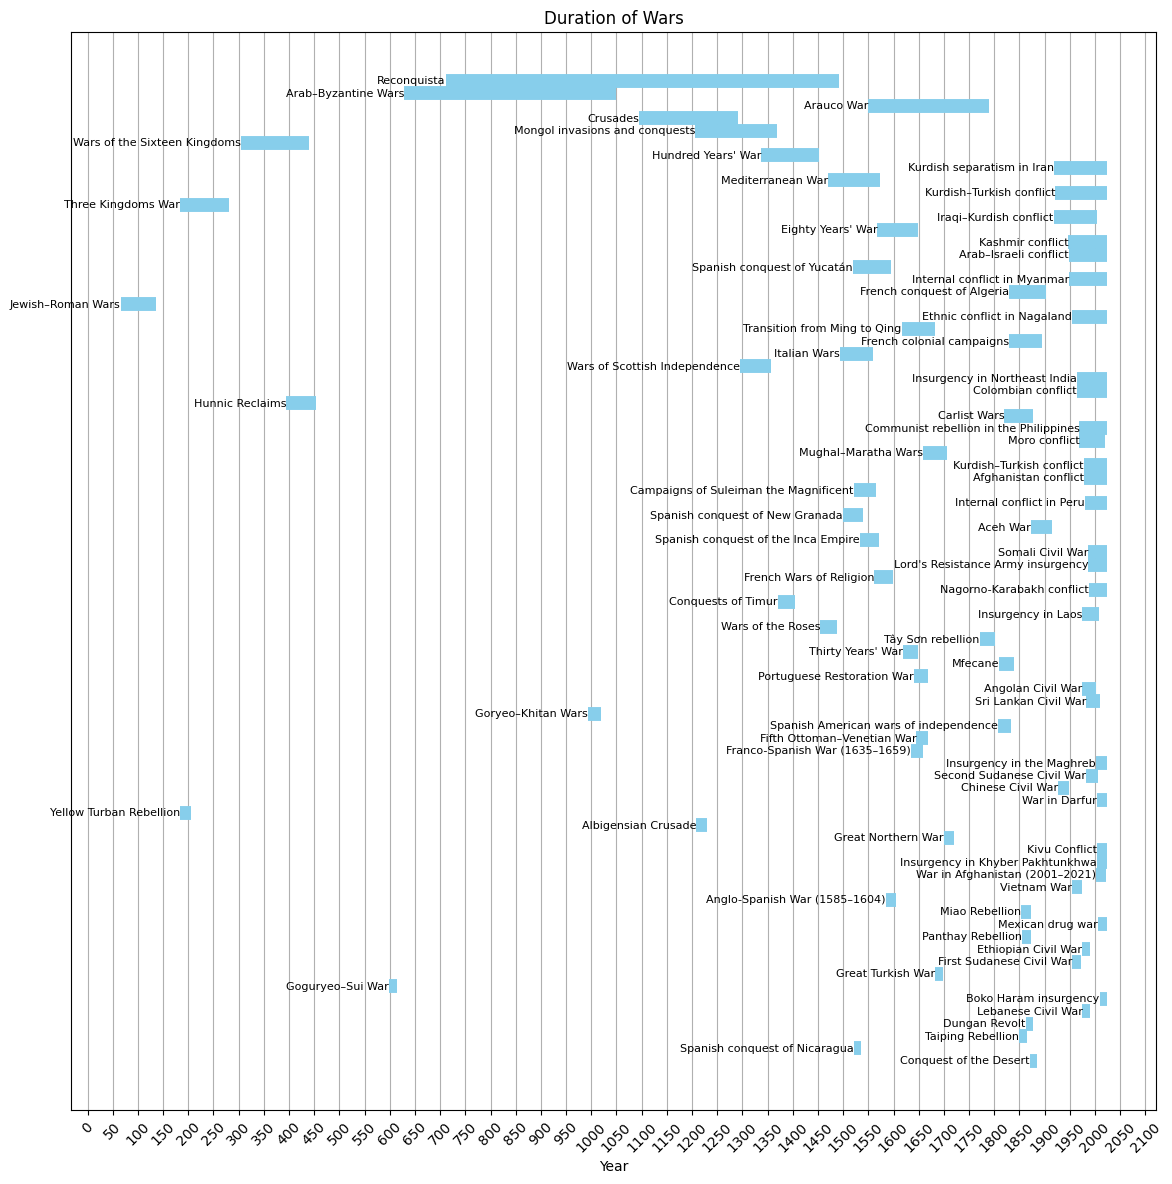

In [93]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top50Longest_sorted = top50Longest.sort_values(by='duration', ascending=True)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 14))

# Plot horizontal lines representing the duration of wars
for idx, row in enumerate(top50Longest_sorted.iterrows()):
    ax.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='skyblue', linewidth=10)
    ax.text(row[1]['startDate'], idx, row[1]['War'], ha='right', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel('Year')
#ax.set_ylabel('War')
ax.set_title('Duration of Wars')

# Set y-axis ticks to evenly spaced positions
#ax.set_yticks(np.arange(len(top30Longest_sorted)))
# Set y-axis tick labels to be the war names
#ax.set_yticklabels(top30Longest_sorted['War'])

# Set x-axis ticks every 50 years
ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.set_xticks(range(0, max_year, 50)) 
# Set the angle of x-axis tick labels
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.xticks(rotation=45)
ax.yaxis.set_ticks([])



plt.show()

In [ ]:
#no subplots

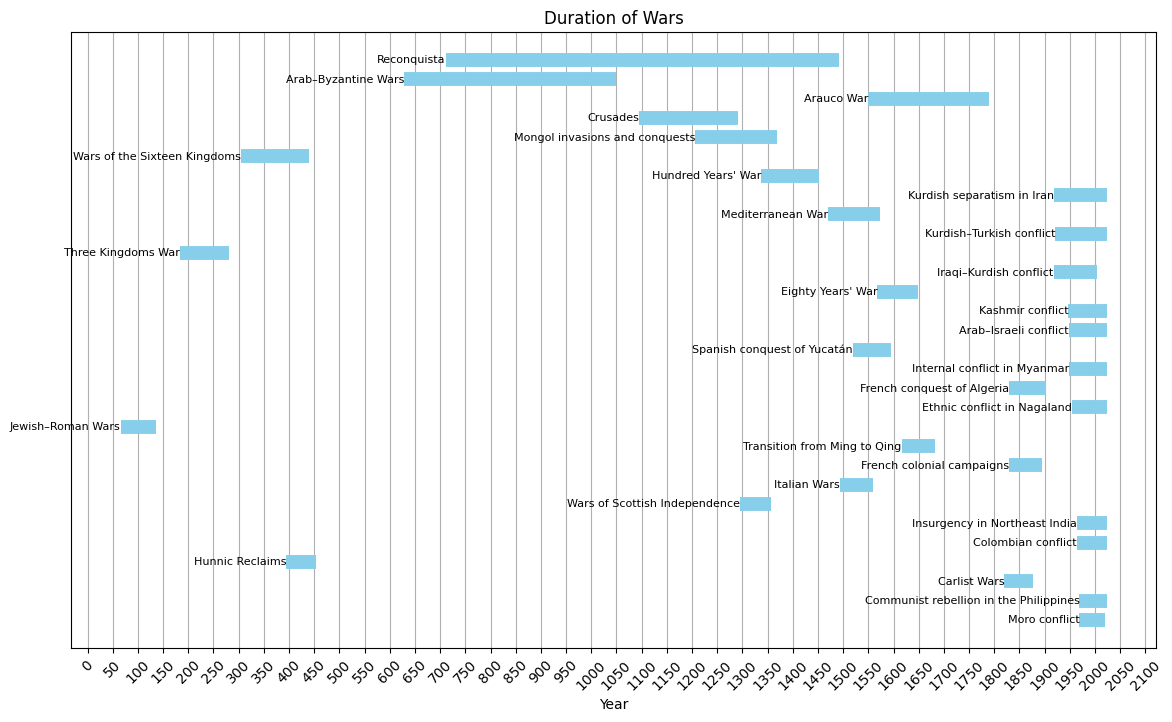

In [96]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'top30Longest' is your DataFrame containing the top 30 longest durations

# Sort the DataFrame by 'duration' in ascending order
top30Longest_sorted = top30Longest.sort_values(by='duration', ascending=True)

# Create a figure object
plt.figure(figsize=(14, 8))

# Plot horizontal lines representing the duration of wars
for idx, row in enumerate(top30Longest_sorted.iterrows()):
    plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='skyblue', linewidth=10)
    plt.text(row[1]['startDate'], idx, row[1]['War'], ha='right', va='center', fontsize=8)

# Set labels and title
plt.xlabel('Year')
plt.title('Duration of Wars')

# Set x-axis ticks every 50 years
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Remove y-axis ticks
plt.gca().yaxis.set_ticks([])

plt.grid(axis='x')  # Add grid lines on the x-axis

plt.show()

In [ ]:
#i like this timeline view
#could also do with top deadly wars...


In [ ]:
#all wars of Poland
#Polish history on timeline?

In [102]:
#BC
bc = df[df['BC'] == True]


In [104]:
bc

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,duration,deathRate
1,Chinese Warring States,True,1500000,1500000,475,221,Seven great powers of China,China,1500000.00,255,5882.35
2,Cimbrian War,True,410000,650000,113,101,Roman Republic vs. Cimbri and Teutones,Western Europe,516236.38,13,39710.49
3,Conquests of Cyrus the Great,True,100000,100000,549,530,Persian Empire vs. various states,Middle East,100000.00,20,5000.00
5,First Punic War,True,400000,400000,264,241,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa,400000.00,24,16666.67
6,Gallic Wars,True,1000000,1000000,58,50,Roman Republic vs. Gallic tribes,France,1000000.00,9,111111.11
7,Greco–Persian Wars,True,300000,300000,499,449,Greek City-States vs. Persian Empire,Greece,300000.00,51,5882.35
12,Punic Wars,True,1620000,1920000,264,146,Roman Republic vs. Carthaginian Empire,Western Europe / North Africa,1763632.61,119,14820.44
13,Qin's Wars of Unification,True,700000,700000,230,221,"Qin state vs. Han, Zhao, Yan, Wei, Chu, Qi States",China,700000.00,10,70000.00
14,Roman civil wars from Social War (91–87 BC) to War of Actium,True,3000000,3000000,91,30,Roman civil wars,Europe/North Africa/Middle East,3000000.00,62,48387.10
15,Samnite Wars,True,33500,33500,343,290,Roman Republic vs. Samnites,Italy,33500.00,54,620.37


In [115]:
def deathRangeFormatted(deaths):
    deaths_formatted = "{:,.0f}".format(deaths)  # Format the number with commas every thousand and no decimal places
    return f'~{deaths_formatted}'
bc['deathsFormatted'] = bc.apply(lambda row: deathRangeFormatted(row['geom_mean']), axis=1)

C:\Users\karol\AppData\Local\Temp\ipykernel_42228\2084089405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['deathsFormatted'] = bc.apply(lambda row: deathRangeFormatted(row['geom_mean']), axis=1)


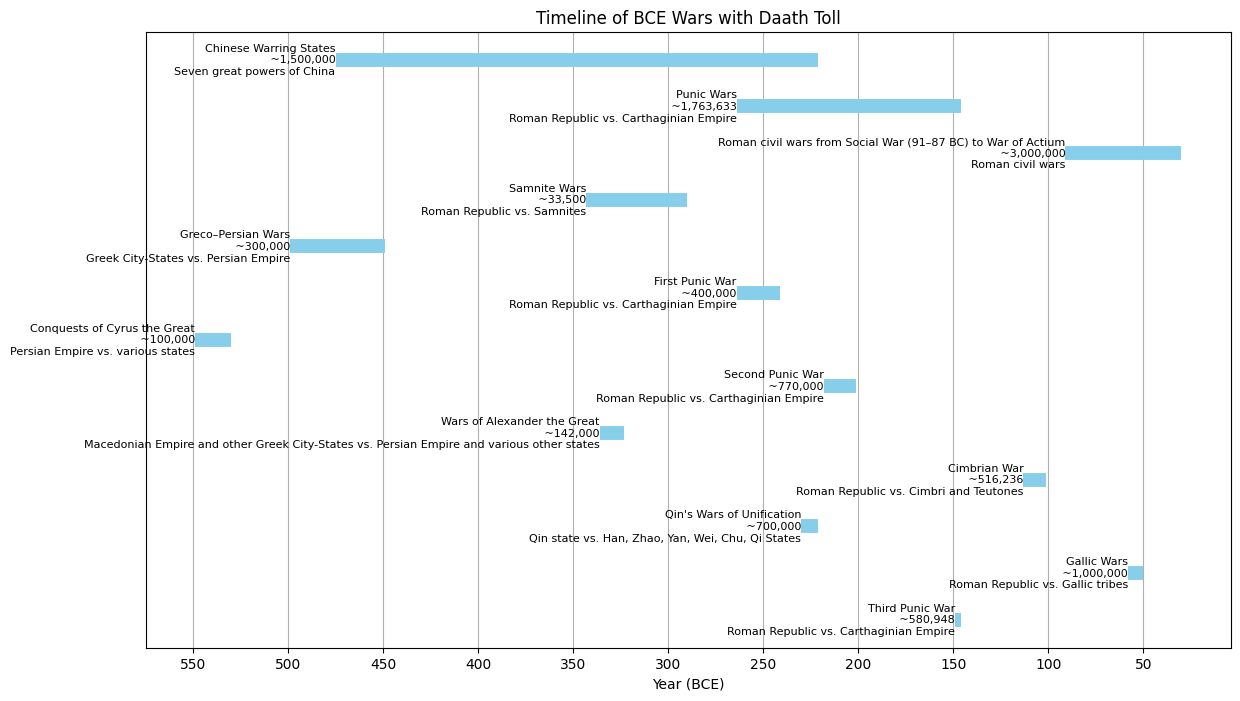

In [123]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'bc' is your DataFrame containing the filtered data

# Sort the DataFrame by 'duration' in ascending order
bc_sorted = bc.sort_values(by='duration', ascending=True)

# Create a figure object
plt.figure(figsize=(14, 8))

# Plot horizontal lines representing the duration of wars
for idx, row in enumerate(bc_sorted.iterrows()):
    plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='skyblue', linewidth=10)

    plt.text(row[1]['startDate'], idx, f"{row[1]['War']}\n {row[1]['deathsFormatted']}\n{row[1]['Combatants']}", ha='right', va='center', fontsize=8)

 
# Set labels and title
plt.xlabel('Year (BCE)')
plt.title('Timeline of BCE Wars with Daath Toll')

# Set x-axis ticks every 50 years
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

# Reverse the direction of the x-axis
plt.gca().invert_xaxis()

# Rotate x-axis tick labels by 45 degrees
#plt.xticks(rotation=45)

# Remove y-axis ticks
plt.gca().yaxis.set_ticks([])

plt.grid(axis='x')  # Add grid lines on the x-axis

plt.show()

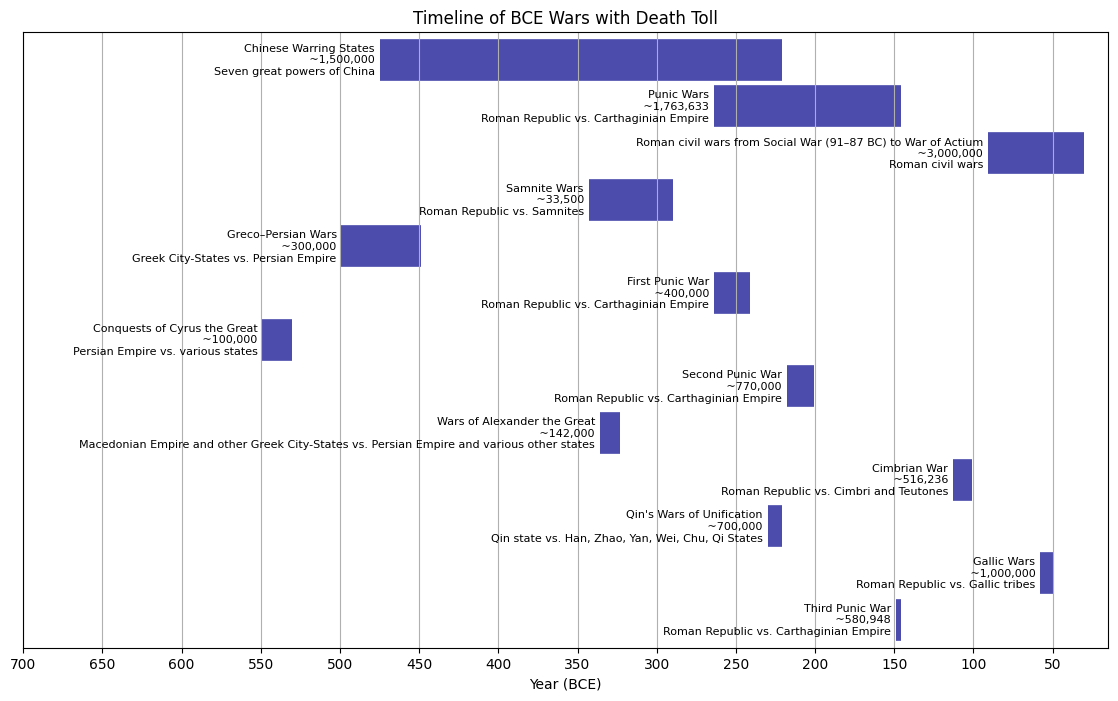

In [146]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'bc' is your DataFrame containing the filtered data

# Sort the DataFrame by 'duration' in ascending order
bc_sorted = bc.sort_values(by='duration', ascending=True)

# Create a figure object
plt.figure(figsize=(14, 8))

# Plot horizontal lines representing the duration of wars with borders
for idx, row in enumerate(bc_sorted.iterrows()):
    border_width = 0.5  # Adjust the width of the borders as needed
    bar_width = 30
    text_offset = 3  # Adjust as needed

    #ymin=idx - border_width, ymax=idx + border_width

    #plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='darkblue', linewidth=10, zorder=1, alpha=0.7)
    #plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='black', linewidth=1, zorder=2)  # Add border
    plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='darkblue', linewidth=bar_width, zorder=1, alpha=0.7)

    plt.text(row[1]['startDate']+text_offset, idx, f"{row[1]['War']}\n {row[1]['deathsFormatted']}\n{row[1]['Combatants']}", ha='right', va='center', fontsize=8)
    border_color = 'lightblue'

    # Plot horizontal lines representing the borders around the bars
#     plt.hlines(y=idx - border_width, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color=border_color, linewidth=border_width, zorder=2)
#     plt.hlines(y=idx + border_width, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color=border_color, linewidth=border_width, zorder=2)
#     plt.vlines(x=row[1]['startDate'], ymin=idx - border_width, ymax=idx + border_width, color=border_color, linewidth=border_width, zorder=2)
#     plt.vlines(x=row[1]['endDate'], ymin=idx - border_width, ymax=idx + border_width, color=border_color, linewidth=border_width, zorder=2)
 
# Set labels and title
plt.xlabel('Year (BCE)')
plt.title('Timeline of Major BCE Wars with Death Toll')

# Extend x-axis range
plt.xlim(15, 700)  # Set the limits from 600 BCE to 0 BCE

# Set x-axis ticks every 50 years
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

# Reverse the direction of the x-axis
plt.gca().invert_xaxis()

# Rotate x-axis tick labels by 45 degrees
#plt.xticks(rotation=45)

# Remove y-axis ticks
plt.gca().yaxis.set_ticks([])

plt.grid(axis='x')  # Add grid lines on the x-axis

plt.show()

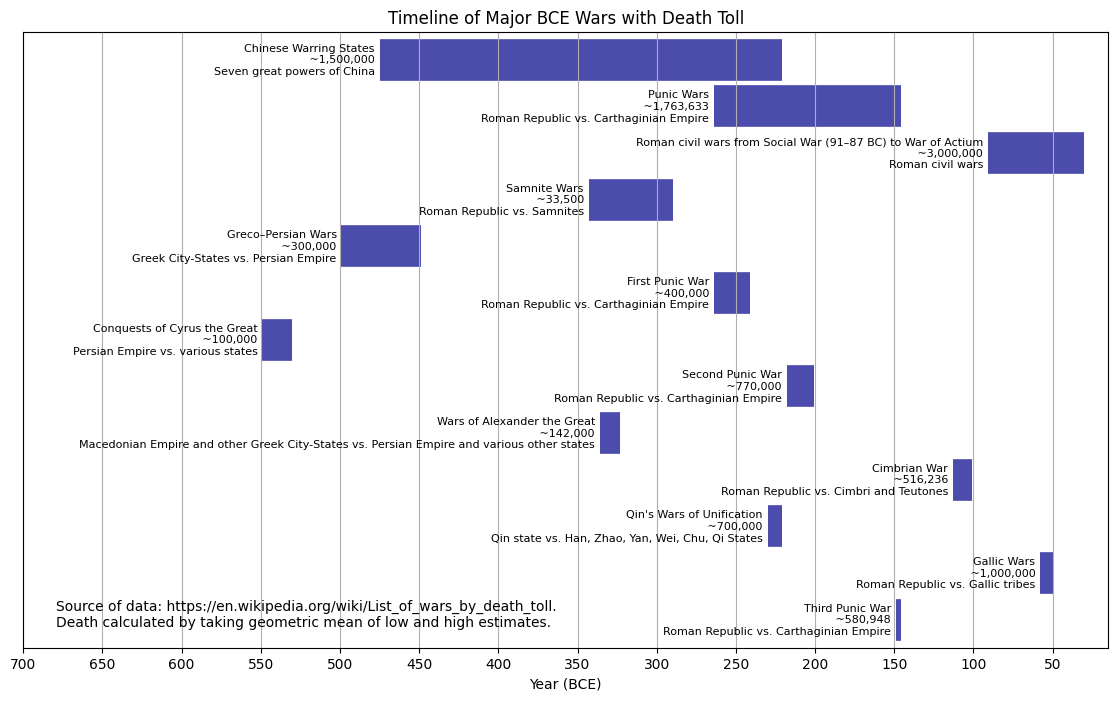

In [160]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'bc' is your DataFrame containing the filtered data

# Sort the DataFrame by 'duration' in ascending order
bc_sorted = bc.sort_values(by='duration', ascending=True)

# Create a figure object
plt.figure(figsize=(14, 8))

# Plot horizontal lines representing the duration of wars with borders
for idx, row in enumerate(bc_sorted.iterrows()):
    border_width = 0.5  # Adjust the width of the borders as needed
    bar_width = 30
    text_offset = 3  # Adjust as needed

    #ymin=idx - border_width, ymax=idx + border_width

    #plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='darkblue', linewidth=10, zorder=1, alpha=0.7)
    #plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='black', linewidth=1, zorder=2)  # Add border
    plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color='darkblue', linewidth=bar_width, zorder=1, alpha=0.7)

    plt.text(row[1]['startDate']+text_offset, idx, f"{row[1]['War']}\n {row[1]['deathsFormatted']}\n{row[1]['Combatants']}", ha='right', va='center', fontsize=8)
    border_color = 'lightblue'

    # Plot horizontal lines representing the borders around the bars
#     plt.hlines(y=idx - border_width, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color=border_color, linewidth=border_width, zorder=2)
#     plt.hlines(y=idx + border_width, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color=border_color, linewidth=border_width, zorder=2)
#     plt.vlines(x=row[1]['startDate'], ymin=idx - border_width, ymax=idx + border_width, color=border_color, linewidth=border_width, zorder=2)
#     plt.vlines(x=row[1]['endDate'], ymin=idx - border_width, ymax=idx + border_width, color=border_color, linewidth=border_width, zorder=2)
 
# Set labels and title
plt.xlabel('Year (BCE)')
plt.title('Timeline of Major BCE Wars with Death Toll')

# Extend x-axis range
plt.xlim(15, 700)  # Set the limits from 600 BCE to 0 BCE

# Set x-axis ticks every 50 years
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

# Reverse the direction of the x-axis
plt.gca().invert_xaxis()

# Rotate x-axis tick labels by 45 degrees
#plt.xticks(rotation=45)

# Remove y-axis ticks
plt.gca().yaxis.set_ticks([])

plt.grid(axis='x')  # Add grid lines on the x-axis

# Add text to the legend
extra_text = "Source of data: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll.\nDeath calculated by taking geometric mean of low and high estimates."
#plt.text(0, 0, extra_text, ha='left', va='bottom')
plt.text(0.03, 0.03, extra_text, fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes)

#plt.legend(title='Legend', handles=[plt.Line2D([], [], label=extra_text, linestyle='none')])
plt.show()



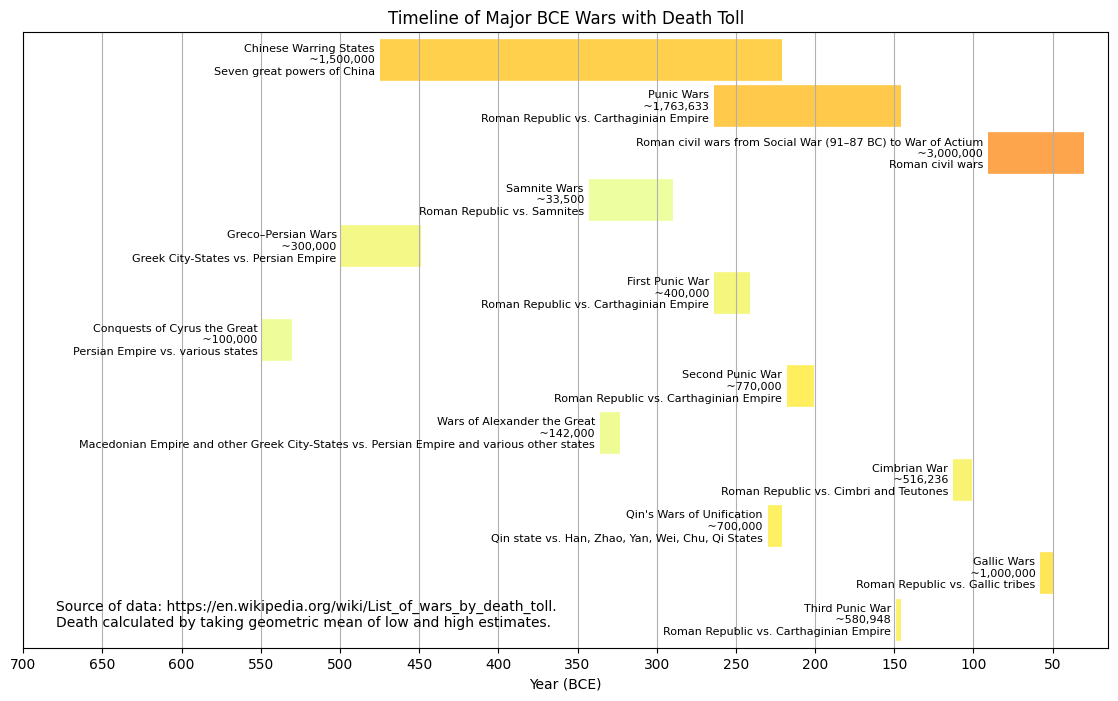

In [168]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Assuming 'bc' is your DataFrame containing the filtered data

# Sort the DataFrame by 'duration' in ascending order
bc_sorted = bc.sort_values(by='duration', ascending=True)

# Create a figure object
plt.figure(figsize=(14, 8))

cmap = plt.get_cmap('Wistia')  # You can choose any colormap you prefer
#cmap = plt.get_cmap('YlOrRd')  # You can choose any colormap you prefer

# Plot horizontal lines representing the duration of wars with borders
for idx, row in enumerate(bc_sorted.iterrows()):
    border_width = 0.5  # Adjust the width of the borders as needed
    bar_width = 30
    text_offset = 3  # Adjust as needed
    
    # Determine color based on geom_mean
    color = cmap(row[1]['geom_mean'] / max(bc_sorted['geom_mean']))  # Normalize to [0, 1]
    
    plt.hlines(y=idx, xmin=row[1]['startDate'], xmax=row[1]['endDate'], color=color, linewidth=bar_width, zorder=1, alpha=0.7)

    plt.text(row[1]['startDate']+text_offset, idx, f"{row[1]['War']}\n {row[1]['deathsFormatted']}\n{row[1]['Combatants']}", ha='right', va='center', fontsize=8)

    border_color = 'lightblue'
# Set labels and title
plt.xlabel('Year (BCE)')
plt.title('Timeline of Major BCE Wars with Death Toll')

# Extend x-axis range
plt.xlim(15, 700)  # Set the limits from 600 BCE to 0 BCE

# Set x-axis ticks every 50 years
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

# Reverse the direction of the x-axis
plt.gca().invert_xaxis()

# Rotate x-axis tick labels by 45 degrees
#plt.xticks(rotation=45)

# Remove y-axis ticks
plt.gca().yaxis.set_ticks([])

plt.grid(axis='x')  # Add grid lines on the x-axis

# Add text to the legend
extra_text = "Source of data: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll.\nDeath calculated by taking geometric mean of low and high estimates."
#plt.text(0, 0, extra_text, ha='left', va='bottom')
plt.text(0.03, 0.03, extra_text, fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes)

#plt.legend(title='Legend', handles=[plt.Line2D([], [], label=extra_text, linestyle='none')])
plt.show()